# Wound Single-shot

### Healing Stages
* `Hemostasis:`  Initial injury or wound debrided (damaged tissue is removed using surgical instruments) during the past 48 hours. ***Indicator: Wound edges are sharp and obvious. Blood clots may be visible.***

* `Inflammatory:` Begins immediately after injury. Duration varies based on presence of infection. ***Indicator: Redness or swelling of the wound edge. Wet or shiny appearance of wound exudate (fluid that has seeped out of tissue). If infected, pus may be visible.***

* `Proliferative:` Tissue is rebuilt through granulation tissue and re-epithelialization. Wound size is reduced by contraction.. ***Indicator: Loss of shiny appearance as wound dries and exudate becomes granulation tissue. Wound edge and center texture may be uneven or variable. Re-epithelializaton forms new epithelium that may have pink coloring, distinguishing it from surrounding intact skin and granulation tissue in the center of the wound. New blood vessels (angiogenesis) may be visible. Overall reduction in wound size as wound contracts.***

* `Maturation:` Also called the remodeling stage of wound healing, tissue is reorganized and strengthened at a cellular level. ***Indicator: Healed with no open wound visible. Hair growth may be seen as skin appendages reform.***

#### References
* Shi, et al. (2015). Convolutional LSTM Network: A Machine Learning Approach for Precipitation Nowcasting. Retrieved December 11th, 2020, from the arXiv database
* S.M. Ali Eslami, et al. (2016). Attend, Infer, Repeat: Fast Scene Understanding with Generative Models. Retrieved Oct 20th, 2020, from the arXiv database
* Karol Gregor, et al. (2016). Towards Conceptual Compression. Retrieved Oct 20th, 2020, from the arXiv database
* S.M. Ali Eslami, et al. (2020). Representation Learning Without Labels ICML 2020
* H. Carrión et al. (2020). Automatic Wound Detection and Size Estimation using Deep Learning Algorithms. Retrieved November 2020 from the biorXiv databse
* Maity et al. Advanced Computational and Communication Paradigms. 2020
* Hinton et al. Science. 2006; 313
* Chino et al. Computer Methods and Programs in Biomedicine. 2020

## Setup

In [ ]:
# Load the Drive helper and mount:
from google.colab import drive

# This will prompt for authorization:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/BETR_Summer23

/content/drive/MyDrive/BETR_Summer23


In [ ]:
#!tar -cf data/near_quad_tr=0.5.tar data/near_quad_tr=0.5 --checkpoint=.100

..tar: data/near_quad_tr=0.5/Day_19_ID1328_092522/Day_19_ID1328_Wound_I_092522: file changed as we read it
tar: data/near_quad_tr=0.5/Day_3_ID1325_090922/Day_3_ID1325_Wound_D_090922: file changed as we read it
..tar: data/near_quad_tr=0.5/Day_11_ID1323_091722/Day_11_ID1323_Wound_C_091722: file changed as we read it
..tar: data/near_quad_tr=0.5/Day_5_ID1323_091122/Day_5_ID1323_Wound_C_091122: file changed as we read it
.tar: data/near_quad_tr=0.5/Day_19_ID1326_092522/Day_19_ID1326_Wound_I_092522: file changed as we read it
tar: data/near_quad_tr=0.5/Day_7_ID1325_091322/Day_7_ID1325_Wound_J_091322: file changed as we read it
...tar: data/near_quad_tr=0.5/Day_6_ID1327_091222/Day_6_ID1327_Wound_B_091222: file changed as we read it
.tar: data/near_quad_tr=0.5/Day_15_ID1325_092122/Day_15_ID1325_Wound_D_092122: file changed as we read it
.tar: data/near_quad_tr=0.5/Day_11_ID1325_091722/Day_11_ID1325_Wound_D_091722: file changed as we read it
.tar: data/near_quad_tr=0.5/Day_1_ID1324_090722/Day

In [ ]:
!cat /proc/cpuinfo | grep "model name" | head -1

model name	: Intel(R) Xeon(R) CPU @ 2.20GHz


In [ ]:
!cat /proc/cpuinfo | grep "model name" | wc -l

8


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!git clone https://github.com/gabrielibagon/TensorBlur.git

fatal: destination path 'TensorBlur' already exists and is not an empty directory.


In [ ]:
#!gdown1y5WmJLThm7BkPDyCCIJTzUVzFx7HoNUX # device all controlls

In [ ]:
!pip install keras-cv
!pip install tensorflow_addons
!pip install gdown
!pip install --upgrade gdown

import numpy as np
import math
import tensorflow as tf
import tensorflow_addons as tfa
from keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, losses
from keras.layers import TimeDistributed, Conv2D, Conv2DTranspose, ConvLSTM2D, LSTM, Concatenate
from keras.layers import MaxPool2D, Input, Dense, Reshape, Dropout, Activation, Flatten
from keras.models import Sequential
from keras.layers import RandomFlip, RandomRotation, RandomContrast, Layer
from keras.layers.pooling import GlobalMaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet121, DenseNet169, Xception, \
    InceptionV3, NASNetMobile, MobileNetV3Small, ResNet50, MobileNet, VGG16
from keras.layers import Activation, Add, BatchNormalization, Concatenate, \
    Conv2D, Dense, Flatten, GlobalMaxPooling2D, Lambda, MaxPooling2D, Reshape, \
    GlobalAveragePooling2D
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess
import pandas as pd
from sklearn.cluster import KMeans
from PIL import Image
from matplotlib import pyplot as plt
import glob
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau, EarlyStopping
import os
import seaborn as sns
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from matplotlib.transforms import Bbox
from PIL import Image, ImageDraw
import copy
from scipy.ndimage.filters import gaussian_filter
from PIL import Image, ImageDraw
import cv2
from skimage import color as skcolor
from skimage import filters as skfilters

%matplotlib inline
%load_ext tensorboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.2/756.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
<ipython-input-3-35f5f5585bff>:46: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


# Training

### Custom augmentation and color correction

In [ ]:
class RandomColorDistortion(tf.keras.layers.Layer):
    def __init__(self, contrast_range=[0.5, 1.5],
                 brightness_delta=[-0.1, 0.1],
                 saturation_range=[0, 0.5],
                 hue_max_delta=0.001,
                 blur=0.5, **kwargs):
        super(RandomColorDistortion, self).__init__(**kwargs)
        self.contrast_range = contrast_range
        self.brightness_delta = brightness_delta
        self.min_sat, self.max_sat = saturation_range
        self.hue_max = hue_max_delta
        self.blur_sigma = blur

    def call(self, images, training=None):
        if not training:
            return images

        contrast = np.random.uniform(
            self.contrast_range[0], self.contrast_range[1])
        brightness = np.random.uniform(
            self.brightness_delta[0], self.brightness_delta[1])

        #images = tf.image.adjust_contrast(images, contrast)
        images = tf.image.adjust_brightness(images, brightness)
        images = tf.image.random_saturation(images, self.min_sat, self.max_sat)
        images = tf.image.random_hue(images, self.hue_max)
        images = tfa.image.gaussian_filter2d(images, self.blur_sigma)

        images = tf.clip_by_value(images, 0, 1)
        return images

In [ ]:
class RandomColorAffine(layers.Layer):
    def __init__(self, brightness=0, jitter=0, **kwargs):
        super().__init__(**kwargs)

        self.brightness = brightness
        self.jitter = jitter

    def get_config(self):
        config = super().get_config()
        config.update({"brightness": self.brightness, "jitter": self.jitter})
        return config

    def call(self, images, training=True):
        if training:
            batch_size = tf.shape(images)[0]

            # Same for all colors
            brightness_scales = 1 + tf.random.uniform(
                (batch_size, 1, 1, 1), minval=-self.brightness, maxval=self.brightness
            )
            # Different for all colors
            jitter_matrices = tf.random.uniform(
                (batch_size, 1, 3, 3), minval=-self.jitter, maxval=self.jitter
            )

            color_transforms = (
                tf.eye(3, batch_shape=[batch_size, 1]) * brightness_scales
                + jitter_matrices
            )
            images = tf.clip_by_value(tf.matmul(images, color_transforms), 0, 1)
        return images

In [ ]:
class GaussianBlur(tf.keras.__internal__.layers.BaseImageAugmentationLayer):
    """Applies a Gaussian Blur with random sigma to an image.
    Args:
        kernel_size: int, 2 element tuple or 2 element list. x and y dimensions for
            the kernel used. If tuple or list, first element is used for the x dimension
            and second element is used for y dimension. If int, kernel will be squared.
        sigma: float, 2 element tuple or 2 element list. Interval in which sigma should
            be sampled from. If float, interval is going to be [0, float), else the
            first element represents the lower bound and the second element the upper
            bound of the sampling interval.
    """

    def __init__(self, kernel_size, sigma, **kwargs):
        super().__init__(**kwargs)
        self.kernel_size = kernel_size
        self.sigma = sigma

        if isinstance(kernel_size, (tuple, list)):
            self.x = kernel_size[0]
            self.y = kernel_size[1]
        else:
            if isinstance(kernel_size, int):
                self.x = self.y = kernel_size
            else:
                raise ValueError(
                    "`kernel_size` must be list, tuple or integer "
                    ", got {} ".format(type(self.kernel_size))
                )

        if isinstance(sigma, (tuple, list)):
            self.sigma_min = sigma[0]
            self.sigma_max = sigma[1]
        else:
            self.sigma_min = type(sigma)(0)
            self.sigma_max = sigma

        if not isinstance(self.sigma_min, type(self.sigma_max)):
            raise ValueError(
                "`sigma` must have lower bound and upper bound "
                "with same type, got {} and {}".format(
                    type(self.sigma_min), type(self.sigma_max)
                )
            )

        if self.sigma_max < self.sigma_min:
            raise ValueError(
                "`sigma` cannot have upper bound less than "
                "lower bound, got {}".format(sigma)
            )

        self._sigma_is_float = isinstance(self.sigma, float)
        if self._sigma_is_float:
            if not self.sigma_min >= 0.0:
                raise ValueError(
                    "`sigma` must be higher than 0"
                    "when is float, got {}".format(sigma)
                )

    def get_random_transformation(self, image=None, label=None, bounding_box=None):
        sigma = self.get_sigma()
        blur_v = GaussianBlur.get_kernel(sigma, self.y)
        blur_h = GaussianBlur.get_kernel(sigma, self.x)
        blur_v = tf.reshape(blur_v, [self.y, 1, 1, 1])
        blur_h = tf.reshape(blur_h, [1, self.x, 1, 1])
        return (blur_v, blur_h)

    def get_sigma(self):
        sigma = self._random_generator.random_uniform(
            shape=(), minval=self.sigma_min, maxval=self.sigma_max
        )
        return sigma

    def augment_image(self, image, transformation=None):

        image = tf.expand_dims(image, axis=0)

        num_channels = tf.shape(image)[-1]
        blur_v, blur_h = transformation
        blur_h = tf.tile(blur_h, [1, 1, num_channels, 1])
        blur_v = tf.tile(blur_v, [1, 1, num_channels, 1])
        blurred = tf.nn.depthwise_conv2d(
            image, blur_h, strides=[1, 1, 1, 1], padding="SAME"
        )
        blurred = tf.nn.depthwise_conv2d(
            blurred, blur_v, strides=[1, 1, 1, 1], padding="SAME"
        )

        return tf.squeeze(blurred, axis=0)

    @staticmethod
    def get_kernel(sigma, filter_size):
        x = tf.cast(
            tf.range(-filter_size // 2 + 1, filter_size // 2 + 1), dtype=tf.float32
        )
        blur_filter = tf.exp(
            -tf.pow(x, 2.0) / (2.0 * tf.pow(tf.cast(sigma, dtype=tf.float32), 2.0))
        )
        blur_filter /= tf.reduce_sum(blur_filter)
        return blur_filter

    def get_config(self):
        config = super().get_config()
        config.update({"sigma": self.sigma, "kernel_size": self.kernel_size})
        return config

AttributeError: ignored

In [ ]:
def get_augmenter(min_area, brightness, jitter):
    zoom_factor = 1.0 - math.sqrt(min_area)
    return keras.Sequential(
        [
            keras.Input(shape=(128, 128, 3)),
            layers.Rescaling(1 / 255),
            layers.RandomFlip("horizontal"),
            layers.RandomTranslation(zoom_factor / 2, zoom_factor / 2),
            layers.RandomZoom((-zoom_factor, 0.0), (-zoom_factor, 0.0)),
            RandomColorAffine(brightness, jitter),
        ]
    )

In [ ]:
def img_is_color(img):

    if len(img.shape) == 3:
        # Check the color channels to see if they're all the same.
        c1, c2, c3 = img[:, : , 0], img[:, :, 1], img[:, :, 2]
        if (c1 == c2).all() and (c2 == c3).all():
            return True

    return False

def show_image_list(list_images, list_titles=None, list_cmaps=None, grid=True, num_cols=2, figsize=(20, 10), title_fontsize=30, save=False, name=""):
    '''
    Shows a grid of images, where each image is a Numpy array. The images can be either
    RGB or grayscale.

    Parameters:
    ----------
    images: list
        List of the images to be displayed.
    list_titles: list or None
        Optional list of titles to be shown for each image.
    list_cmaps: list or None
        Optional list of cmap values for each image. If None, then cmap will be
        automatically inferred.
    grid: boolean
        If True, show a grid over each image
    num_cols: int
        Number of columns to show.
    figsize: tuple of width, height
        Value to be passed to pyplot.figure()
    title_fontsize: int
        Value to be passed to set_title().
    '''

    assert isinstance(list_images, list)
    assert len(list_images) > 0
    assert isinstance(list_images[0], np.ndarray)

    if list_titles is not None:
        assert isinstance(list_titles, list)
        assert len(list_images) == len(list_titles), '%d imgs != %d titles' % (len(list_images), len(list_titles))

    if list_cmaps is not None:
        assert isinstance(list_cmaps, list)
        assert len(list_images) == len(list_cmaps), '%d imgs != %d cmaps' % (len(list_images), len(list_cmaps))

    num_images  = len(list_images)
    num_cols    = min(num_images, num_cols)
    num_rows    = int(num_images / num_cols) + (1 if num_images % num_cols != 0 else 0)

    # Create a grid of subplots.
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    # Create list of axes for easy iteration.
    if isinstance(axes, np.ndarray):
        list_axes = list(axes.flat)
    else:
        list_axes = [axes]

    for i in range(num_images):

        img    = list_images[i]
        title  = list_titles[i] if list_titles is not None else 'Image %d' % (i)
        cmap   = list_cmaps[i] if list_cmaps is not None else (None if img_is_color(img) else 'gray')

        list_axes[i].imshow(img, cmap=cmap)
        list_axes[i].set_title(title, fontsize=title_fontsize)
        list_axes[i].grid(grid)

    for i in range(num_images, len(list_axes)):
        list_axes[i].set_visible(False)

    fig.tight_layout()
    if save:
        fig.savefig(f"{name}.pdf")
    _ = plt.show()

### Temporal Validity

Tuple setup:
1. Same wound pairs only (avoids young vs old heal rate issue)
2. Positive class -> temporally valid (forward in time)
3. Negative class -> temporally invalid (backwards in time)
4. Same day pairs skipped

This means 16 wounds * 16 days per wound * 15 pairs per day = 3,840 pairs

In [ ]:
import gc

In [ ]:
gc.collect()

In [ ]:
base = '/sample_data/content/drive/MyDrive/Winter 2023/DARPA/Device Control Data/cropped_control_full/'

In [ ]:
wounds = ["Wound_2", "Wound_6", "Wound_7"]
days = 6

x_example = np.ndarray((2, 128, 128, 3), dtype=np.float32) # pairs of images
y_example = np.ndarray((3), dtype=np.float32) # validity, day_left, day_right

x_train = np.ndarray((60000, 2, 128, 128, 3), dtype=np.float32)
y_train = np.ndarray((60000, 3), dtype=np.float32)

ctr_train = 0
cache = {}
max_samples = 50

for wound in tqdm(wounds):
    for day in tqdm(range(days)):
        left_paths = glob.glob(f"{base + wound}/Day {str(day)}/*.jpg",
                                recursive=True)
        if len(left_paths) > max_samples:
            left_paths = np.random.choice(left_paths, max_samples, replace=False)

        for left_path in left_paths:
            if left_path in cache:
                left_image = cache[left_path]
            else:
                im_l = Image.open(left_path)
                left_image = img_to_array(im_l)
                cache[left_path] = left_image

            for i in range(days):
                if i != day:
                    right_paths = glob.glob(f"{base + wound}/Day {str(i)}/*.jpg",
                                recursive=True)
                    if len(right_paths) > max_samples:
                        right_paths = np.random.choice(right_paths, max_samples,
                                                       replace=False)

                    for right_path in right_paths:
                        if right_path in cache:
                            right_image = cache[right_path]
                        else:
                            im_r = Image.open(right_path)
                            right_image = img_to_array(im_r)
                            cache[right_path] = right_image

                        x_example[0] = left_image
                        x_example[1] = right_image

                        if day < i:
                            val = 1
                            y_example[0] = val # positive pair
                        else:
                            val = 0
                            y_example[0] = val # negaitve pair

                        y_example[1] = day
                        y_example[2] = i

                        x_train[ctr_train] = x_example
                        y_train[ctr_train] = y_example

                        ctr_train += 1
print(ctr_train)

In [ ]:
wounds = ["Wound_3"]
days = 6

x_example = np.ndarray((2, 128, 128, 3), dtype=np.float32) # pairs of images
y_example = np.ndarray((3), dtype=np.float32) # validity, day_left, day_right

x_val = np.ndarray((8000, 2, 128, 128, 3), dtype=np.float32)
y_val = np.ndarray((8000, 3), dtype=np.float32)

cache = {}
max_samples = 20
ctr_val = 0

for wound in tqdm(wounds):
    for day in tqdm(range(days)):
        left_paths = glob.glob(f"{base + wound}/Day {str(day)}/*.jpg",
                                recursive=True)
        if len(left_paths) > max_samples:
            left_paths = np.random.choice(left_paths, max_samples, replace=False)

        for left_path in left_paths:
            if left_path in cache:
                left_image = cache[left_path]
            else:
                im_l = Image.open(left_path)
                left_image = img_to_array(im_l)
                cache[left_path] = left_image

            for i in range(days):
                if i != day:
                    right_paths = glob.glob(f"{base + wound}/Day {str(i)}/*.jpg",
                                recursive=True)
                    if len(right_paths) > max_samples:
                        right_paths = np.random.choice(right_paths, max_samples,
                                                       replace=False)

                    for right_path in right_paths:
                        if right_path in cache:
                            right_image = cache[right_path]
                        else:
                            im_r = Image.open(right_path)
                            right_image = img_to_array(im_r)
                            cache[right_path] = right_image

                        x_example[0] = left_image
                        x_example[1] = right_image

                        if day < i:
                            val = 1
                            y_example[0] = val # positive pair
                        else:
                            val = 0
                            y_example[0] = val # negaitve pair

                        y_example[1] = day
                        y_example[2] = i

                        x_val[ctr_val] = x_example
                        y_val[ctr_val] = y_example

                        ctr_val += 1
print(ctr_val)

3,840 pairs of 2 images size 128x128x3

##DenseNet

In [ ]:
random_pairs = np.random.randint(ctr_train, size=12)
ratio = 1.0/255.0
display_ims = []
metadata = []
for pair in random_pairs:
    images = copy.deepcopy(x_train[pair])
    images *= ratio
    display_ims.append(np.hstack(images))
    validity, day_a, day_b = y_train[pair]
    if validity == 1:
        pair_class = "positive"
    else:
        pair_class = "negative"

    metadata.append(f"Day {str(int(day_a))} (left) and day {str(int(day_b))} (right), {pair_class} pair")

show_image_list(display_ims,
                list_titles=metadata,
                grid=False,
                num_cols=3,
                title_fontsize=16,
                save=True,
                name="Random pair sample")

In [ ]:
def augment(images):
    images = RandomFlip("horizontal_and_vertical")(images)
    images = RandomRotation(0.5, fill_mode='constant')(images)
    images = RandomContrast(0.5)(images)
    #images = RandomColorDistortion()(images)
    image = GaussianBlur(kernel_size=(3, 3), sigma=(0, 2))(images)
    return images

In [ ]:
#random_pairs = np.random.randint(pairs_train, size=12)

display_ims = []
metadata = []
for pair in random_pairs:
    images = copy.deepcopy(x_train[pair])
    images *= ratio
    images = augment(images)

    display_ims.append(np.hstack(images))
    validity, day_a, day_b = y_train[pair]
    if validity == 1:
        pair_class = "positive"
    else:
        pair_class = "negative"

    metadata.append(f"Day {str(int(day_a))} (left) and day {str(int(day_b))} (right), {pair_class} pair")

show_image_list(display_ims,
                list_titles=metadata,
                grid=False,
                num_cols=3,
                title_fontsize=16,
                save=True,
                name="Random pair sample")

## Definitions

### Shuffle and learn model

In [ ]:
del cache
gc.collect()

In [ ]:
in_shape = (128, 128, 3)
latent_size = 16

WARNING - IF CHANGING BASE MODEL EDIT PREPROCESSING AS APPROPRIATE

In [ ]:
base_model = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape = in_shape
)

In [ ]:
# This actually happens second than bellow
x = base_model.output
x = GlobalMaxPooling2D()(x) # should we do average pooling?
x = Dropout(0.3)(x) # should experiment with this
x = Dense(latent_size)(x)

feature_extractor = Model(inputs=base_model.input, outputs=x)

In [ ]:
#keras.utils.plot_model(feature_extractor, show_shapes=True)

In [ ]:
#feature_extractor.summary()

In [ ]:
# good cell to remember when getting funky with layers (augmentation)
img_a = Input(shape=in_shape)
img_b = Input(shape=in_shape)

x_a = RandomFlip("horizontal_and_vertical")(img_a)
x_a = RandomRotation(0.5, fill_mode='constant')(x_a)
x_a = RandomContrast(0.5)(x_a)
x_a = GaussianBlur(kernel_size=(3, 3), sigma=(0, 2))(x_a)
#x_a = RandomColorDistortion()(x_a)

x_b = RandomFlip("horizontal_and_vertical")(img_b)
x_b = RandomRotation(0.5, fill_mode='constant')(x_b)
x_b = RandomContrast(0.5)(x_b)
x_b = GaussianBlur(kernel_size=(3, 3), sigma=(0, 2))(x_b)
#x_b = RandomColorDistortion()(x_b)

x_a = densenet_preprocess(x_a)
x_b = densenet_preprocess(x_b)

features_a = feature_extractor(x_a)
features_b = feature_extractor(x_b)

concat = Concatenate()([features_a, features_b])

output = Dense(1, activation="sigmoid")(concat)
temporal_encoder = Model(inputs=[img_a, img_b], outputs=output)

In [ ]:
keras.utils.plot_model(temporal_encoder, show_shapes=True)

In [ ]:
temporal_encoder.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
%cd /content/drive/My\ Drive/Winter\ 2023/DARPA/HealNet/

In [ ]:
best_model_file = "./Saved Weights/HealNet_encoder_device_patches.h5"

earlystop = EarlyStopping(monitor = 'val_accuracy',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                              factor = 0.1,
                              patience = 6,
                              min_lr = 0.00001,
                              verbose = 1)

tensor_board = tbCallBack = TensorBoard(log_dir = f'./logs/HealNet_encoder_device_patches',
                                        histogram_freq = 0,
                                        write_graph = True,
                                        write_images = False)


best_model = ModelCheckpoint(best_model_file,
                             monitor = 'val_accuracy',
                             mode = 'auto',
                             verbose = 1,
                             save_best_only = True)

callback_list = [reduce_lr, earlystop, best_model, tensor_board]

### Temporal Encoder Training Step

In [ ]:
history_densenet = temporal_encoder.fit(
    x = [x_train[:,0], x_train[:,1]],
    y = y_train[:, 0],
    validation_data = (([x_val[:,0], x_val[:,1]]), y_val[:, 0]),
    batch_size = 32,
    epochs = 10,
    verbose = 1,
    callbacks = callback_list
)

This is an even easier task for the pig data since there is LARGER deltas between day observations (i.e. Day 15 and Day 21 vs Day 10 and Day 11).

In [ ]:
%tensorboard --logdir ./logs/HealNet_encoder_device_patches

In [ ]:
#temporal_encoder = keras.models.load_model(best_model_file)

In [ ]:
test_loss, test_acc = temporal_encoder.evaluate(x=[x_test[:,0],
                                                   x_test[:,1]],
                                                y=y_test[:, 0])

In [ ]:
val_acc = history_densenet.history['val_accuracy'][:]
acc = history_densenet.history['accuracy']

plt.plot(acc, label='Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.ylabel('Accuracy (%)')
plt.title('Temporal Training DenseNet Accuracy')
plt.xlabel('Epoch')
plt.savefig('Temporal Encoder DenseNet (Blanced Patch) Accuracy.pdf')
plt.show()

In [ ]:
val_loss = history_densenet.history['val_loss']
loss = history_densenet.history['loss']

plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.ylabel('Categorical Crossentropy')
plt.title('Temporal Training DenseNet Loss')
plt.xlabel('Epoch')
plt.savefig('Temporal Encoder DenseNet (Balanced) Loss.pdf')
plt.show()

### Grad-Cams

In [ ]:
import matplotlib.cm as cm

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.layers[-4].layers[-4].output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
last_conv_idx = -4
dense_cls.layers[-1].activation = None

In [ ]:
dense_cls.layers[-4].layers[-4]

In [ ]:
sample = test_generator.next()

In [ ]:
sample = np.expand_dims(sample[0][0], axis=0)

In [ ]:
preds = dense_cls.predict(sample)

In [ ]:
preds

In [ ]:
heatmap = make_gradcam_heatmap(sample, dense_cls)

## Day delta performance

In [ ]:
# how to get input/gt pairs
x = [x_train[:,0], x_train[:,1]],
y = y_train[:, 0],

In [ ]:
train_preds = temporal_encoder.predict(x)

In [ ]:
delta_hits = {}
validities = []

for i in range(len(train_preds)):
    pred = train_preds[i]

    if pred >= 0.5:
        pred = 1.0
    else:
        pred = 0.0

    validity, day_a, day_b = y_train[i]
    validities.append(validity)
    delta = abs(day_a - day_b)

    if pred == validity:
        correct = 1
    else:
        correct = 0

    if delta in delta_hits:
        delta_hits[delta].append(correct)
    else:
        delta_hits[delta] = [correct]

In [ ]:
delta_acc = {}

for delta, preds in delta_hits.items():
    acc = sum(preds)/len(preds)

    delta_acc[delta] = acc

In [ ]:
train_table = pd.DataFrame.from_dict(delta_acc, orient='index')

####GET THE VALUES FROM THE CSV's

In [ ]:
train_table

In [ ]:
train_table.to_csv("./temporal_train_accuracy (pig).csv")

In [ ]:
# how to get the day range and the validity
validity, day_a, day_b = y_val[0]

In [ ]:
# how to get input/gt pairs
x = [x_val[:,0], x_val[:,1]],
y = y_val[:, 0],

In [ ]:
val_preds = temporal_encoder.predict(x)

In [ ]:
delta_hits = {}
validities = []

for i in range(len(val_preds)):
    pred = val_preds[i]

    if pred >= 0.5:
        pred = 1.0
    else:
        pred = 0.0

    validity, day_a, day_b = y_val[i]
    validities.append(validity)
    delta = abs(day_a - day_b)

    if pred == validity:
        correct = 1
    else:
        correct = 0

    if delta in delta_hits:
        delta_hits[delta].append(correct)
    else:
        delta_hits[delta] = [correct]

In [ ]:
delta_acc = {}

for delta, preds in delta_hits.items():
    acc = sum(preds)/len(preds)

    delta_acc[delta] = acc

In [ ]:
val_table = pd.DataFrame.from_dict(delta_acc, orient='index')

In [ ]:
val_table

In [ ]:
val_table.to_csv("./temporal_validation_accuracy (pig).csv")

In [ ]:
# how to get input/gt pairs
x = [x_test[:,0], x_test[:,1]]
test_preds = temporal_encoder.predict(x)

In [ ]:
delta_hits = {}
validities = []

for i in range(len(test_preds)):
    pred = test_preds[i]

    if pred >= 0.5:
        pred = 1.0
    else:
        pred = 0.0

    validity, day_a, day_b = y_test[i]
    validities.append(validity)
    delta = abs(day_a - day_b)

    if pred == validity:
        correct = 1
    else:
        correct = 0

    if delta in delta_hits:
        delta_hits[delta].append(correct)
    else:
        delta_hits[delta] = [correct]

In [ ]:
delta_acc = {}

for delta, preds in delta_hits.items():
    acc = sum(preds)/len(preds)

    delta_acc[delta] = acc

In [ ]:
test_table = pd.DataFrame.from_dict(delta_acc, orient='index')

In [ ]:
test_table

In [ ]:
test_table.to_csv("./temporal_test_accuracy (pig).csv")

## Temporal encodings on treated wounds and controls

In [ ]:
# best_model_file = "./Saved Weights/HealNet_encoder.h5"
# model = keras.models.load_model(best_model_file)

Get features from pre-trained temporal validation model (feature extractor only)

### Generate 128x128's

In [ ]:
# for fn in tqdm(glob.glob("/content/near/**/**.JPG", recursive=True)):
#     im = Image.open(fn).resize((128,128))
#     os.makedirs("./128x128" + fn[13:-12], exist_ok=True)
#     im.save("./128x128" + fn[13:])

In [ ]:
def get_feature_vectors(model, direc):
    features = []
    img_names = []
    image_fns = glob.glob(f"{direc}**/**.jpg", recursive=True)
    #ratio = 1.0/255.0
    for i in tqdm(image_fns):
        fn = i
        loaded_image = load_img(fn)
        image_data = img_to_array(loaded_image)
        image_data = densenet_preprocess(image_data) # densenet hardcoded!
        image_data = np.expand_dims(image_data, axis=0) # adds batch dim
        feat = model.predict(image_data)
        feat = feat.flatten()
        features.append(feat)
        img_names.append(i)

    return features, img_names

In [ ]:
feature_vectors, image_names = get_feature_vectors(feature_extractor, direc)

In [ ]:
image_cluster = pd.DataFrame(image_names, columns=['image'])

In [ ]:
#Creating Clusters
k = 4 # one per healing stage
clusters = KMeans(k)
clusters.fit(feature_vectors)

In [ ]:
image_cluster["cluster"] = clusters.labels_

In [ ]:
image_cluster

In [ ]:
print(direc)
img_dirs = glob.glob(f"{direc}**/**.JPG", recursive=True)

for i in range(k):

    imgs_k = image_cluster[image_cluster['cluster'] == i]
    num = len(imgs_k)     #  number of elements for each cluster
    r = np.floor(num/10.)    # number of rows in the figure of the cluster

    print("cluster "+str(i))
    print(str(num)+" elements")

    if num < 35:
        fig = plt.figure(figsize=(10,5))
    elif num < 65:
        fig = plt.figure(figsize=(10,8))
    else:
        fig = plt.figure(figsize=(10,14))

    j = 0
    aged = 0
    days_aged = 0
    young = 0
    days_young = 0
    for im in imgs_k.iterrows():
        day = int(im[1]['image'].split("Day")[1].split("_")[1])

        # if 'Y8' in im[1]['image']:
        #     young += 1
        #     days_young += day

        # else:
        aged += 1
        days_aged += day

        plt.subplot(r+1, 10, j+1)
        img = plt.imread(im[1]['image'])
        plt.imshow(img)
        plt.axis('off')
        plt.title("Day " + str(day))

        j += 1
    plt.show()
    print(f"In cluster {i}, there are {young} young mice and {aged} aged mice.")
    print(f"The average wound age is {round(days_aged/(aged + 0.00000000001), 1)}.")
    if i == 0:
        stage = "Proliferation"
    elif i == 1:
        stage = "Inflammation"
    elif i == 2:
        stage = "Hemostasis"
    elif i == 3:
        stage = "Maturation"
    elif i == 4:
        stage = "Proliferation/Maturation"
    elif i == 5:
        stage = "Hemostasis"
    else:
        stage = "ERROR"

    print(f"We can call this cluster {stage}.")
    fig.savefig(f"Cluster {i}, with k {k}, DenseNet.pdf")
    print()

In [ ]:
densenet_cluster_stage = {0:"Proliferation", 1:"Hemostasis", 2:"Inflammatory", 3:"Maturation"}

Some are potentially wrong, for example the inflammation cluster includes a day 9 image and we truly dont expect imflammation that far into the healing process. Again, these stages overlap and setting them into these hard categories can introduce error. Also clearly many images are dity and there is potential for some data leak with the splints. We *could* validate using the labels we collected but that wont be public yet.

In [ ]:
class_0_vectors = []
class_1_vectors = []
class_2_vectors = []

popped = []
while(len(class_0_vectors)!= 100):
    rand_index = np.random.randint(0, high=1650, size=1)[0]
    if rand_index not in popped:
        if image_cluster['cluster'][rand_index] == 0:
            class_0_vectors.append(feature_vectors[rand_index])
            popped.append(rand_index)


while(len(class_1_vectors)!= 100):
    rand_index = np.random.randint(0, high=1650, size=1)[0]
    if rand_index not in popped:
        if image_cluster['cluster'][rand_index] == 1:
            class_1_vectors.append(feature_vectors[rand_index])
            popped.append(rand_index)

while(len(class_2_vectors)!= 100):
    rand_index = np.random.randint(0, high=1650, size=1)[0]
    if rand_index not in popped:
        if image_cluster['cluster'][rand_index] == 2:
            class_2_vectors.append(feature_vectors[rand_index])
            popped.append(rand_index)

In [ ]:
class_100 = class_0_vectors + class_1_vectors + class_2_vectors

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
clusters.cluster_centers_.shape

In [ ]:
#Load Data
pca = PCA(n_components=16)

#Transform the data
df = pca.fit_transform(feature_vectors)

df.shape

In [ ]:
label = clusters.predict(df)

In [ ]:
len(label)

In [ ]:
plt.scatter(df[:, 0], df[:, 1],
            c=image_cluster['cluster'][:th], edgecolor='none', alpha=0.7,
            cmap=plt.cm.get_cmap('Paired', 3))
plt.xlabel('1st Component')
plt.ylabel('2nd Component')
title="2-Dimensional PCA Visualization of Heal-Stage Clusters"
plt.title(title)
plt.savefig(title+" all.pdf")
plt.colorbar()
plt.figure(figsize=(18, 8))

In [ ]:
filtered_label0 = df[label == 0]
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

In [ ]:
#filter rows of original data
filtered_label2 = df[label == 0]

filtered_label8 = df[label == 1]

#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

In [ ]:
#filter rows of original data
filtered_label2 = df[label == 0]

filtered_label8 = df[label == 1]

#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

In [ ]:
#Getting unique labels

u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
#Getting unique labels

u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = stages_pca[i])
plt.legend()
plt.savefig('Pig HealNet Clusters (Patches 2x4).pdf')
plt.show()

In [ ]:
np.bincount(label)

In [ ]:
densenet_cluster_stage

In [ ]:
stages_pca = ["Inflammatory", "Proliferation/Maturation", "Hemostasis"]

In [ ]:
u_labels

In [ ]:
centroids = clusters.cluster_centers_
u_labels = np.unique(label)

#plotting the results:

for i in [1, 2, 0]:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = stages_pca[i])
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
title="2-Dimensional PCA Visualization of Heal-Stage Clusters"
#plt.title(title)
# plt.savefig(title+".pdf")
plt.show()

Next up, train **from scratch (imagenet pre-train or no?)** using these "pseudo labels", probably want to do augmentation and have a held out test/valid set

In [ ]:
densenet_cluster_stage

In [ ]:
image_cluster

In [ ]:
test

In [ ]:
#image_cluster.to_csv("pig_pseudolables_k4_from_full-im_append.csv", index=False)

In [ ]:
#full_im_clusters = pd.read_csv("pig_pseudolables_k3.csv")

In [ ]:
col['image']

In [ ]:
densenet_cluster_stage = {0: 'Proliferation', 1: 'Hemostasis', 2: 'Inflammatory', 3: "Maturation"}

In [ ]:
new_table = {'image':[], 'cluster':[]}

for row, col in image_cluster.iterrows():
    # get cluster from prev list, leave matu as-is
    if "Day_21_" in col['image']:
        # set cls to 3
        new_table['image'].append(col['image'])
        new_table['cluster'].append(3)
    elif "Day_0_" in col['image']:
        new_table['image'].append(col['image'])
        new_table['cluster'].append(1)
    else:
        id = col['image'].split("/")[-1].split("-")[0]
        # loaded from previous experiment
        prev_cluster = full_im_clusters[full_im_clusters['image'].str.contains(id)]
        new_cls = prev_cluster['cluster'].values[0]

        new_table['image'].append(col['image'])
        new_table['cluster'].append(new_cls)


In [ ]:
image_cluster = pd.DataFrame.from_dict(new_table)

In [ ]:
image_cluster

In [ ]:
#image_cluster.to_csv("patches_k4_corrected.csv", index=False)

In [ ]:
# image_cluster = pd.DataFrame.from_dict(new_table)

In [ ]:
# densenet_cluster_stage = {0: 'Proliferation', 1: 'Hemostasis', 2: 'Inflammatory',
#                           3: 'Maturation'}

#####Cleanning noise by majority vote:

In [ ]:
names = list(image_cluster['image'])
for i in range(0, len(names), 5):
    group = names[i][:-12]
    mask = image_cluster['image'].str.contains(group)
    image_cluster[mask]

    scores = {0:0, 1:0, 2:0}
    for cluster in list(image_cluster[mask]['cluster']):
        scores[cluster] += 1

    winner = np.argmax(list(scores.values()))

    for idx in image_cluster[mask].index:
        image_cluster.at[idx, 'cluster'] = winner

In [ ]:
#image_cluster.to_csv("pig_pseudolables_k3_new_clean.csv", index=False)

In [ ]:
image_cluster

### Training

Validation set:
* A8-5-L
* Y8-2-R


In [ ]:
# val_temp = image_cluster[image_cluster['image'].str.contains('A8-5-L', na=False)]
# val_temp_2 = image_cluster[image_cluster['image'].str.contains('Y8-2-R', na=False)]
val_df = image_cluster[image_cluster['image'].str.contains('1324', na=False)]

assert len(val_df) == 360

Test set:
* A8-1-R
* Y8-4-L

In [ ]:
# test_temp = image_cluster[image_cluster['image'].str.contains('A8-1-R', na=False)]
# test_temp_2 = image_cluster[image_cluster['image'].str.contains('Y8-4-L', na=False)]
test_df = image_cluster[image_cluster['image'].str.contains('1325', na=False)]

assert len(test_df) == 360

Train set all remaining images

In [ ]:
train_df = image_cluster.copy()
cond = image_cluster['image'].isin(val_df['image'])
train_df.drop(train_df[cond].index, inplace=True)

cond = image_cluster['image'].isin(test_df['image'])
train_df.drop(train_df[cond].index, inplace=True)
assert len(train_df) == (len(image_cluster) - (len(val_df) + len(test_df)))

In [ ]:
 # not doing any rescaling here as preprocess_input should deal with it
image_generator = ImageDataGenerator(

)

In [ ]:
!ls data

ls: cannot access 'data': No such file or directory


In [ ]:
img_dir = direc

In [ ]:
train_generator = image_generator.flow_from_dataframe(
    dataframe = train_df,
    directory = img_dir,
    x_col = "image",
    y_col = "cluster",
    batch_size = 16,
    shuffle = True,
    class_mode = "raw",
    target_size = (128, 128)
)

In [ ]:
# Flow from directory with specified batch size and target image size
val_generator = image_generator.flow_from_dataframe(
    dataframe = val_df,
    directory = img_dir,
    x_col = "image", # features
    y_col = "cluster", # labels
    class_mode = "raw", # 'Mass' column should be in train_df
    batch_size = 16, # images per batch
    shuffle = True, # shuffle the rows or not
    target_size = (128, 128) # width and height of output image
)

In [ ]:
# Flow from directory with specified batch size and target image size
test_generator = image_generator.flow_from_dataframe(
    dataframe = test_df,
    directory = img_dir,
    x_col = "image", # features
    y_col = "cluster", # labels
    class_mode = "raw",
    batch_size = 16, # images per batch
    shuffle = False, # shuffle the rows or not
    target_size = (128, 128) # width and height of output image
)

DO NOT RETRAIN FROM SCRATCH

In [ ]:
CLASSES = 4 # change this for output head PLEASE

In [ ]:
# base = DenseNet121(
#     weights='imagenet',
#     include_top=False,
#     input_shape=in_shape
# )

Should we recover from here a pre-trained base model (feature extractor?).

In [ ]:
#base_model.save('/content/drive/MyDrive/Fall 2022/Davinci/HealNet/Saved Weights/base_model_patch2x4.h5')

In [ ]:
input = Input(shape=in_shape)

x = RandomFlip("horizontal_and_vertical")(input)
x = RandomRotation(0.5, fill_mode='constant')(x)
x = RandomContrast(0.5)(x)
x = GaussianBlur(kernel_size=(3, 3), sigma=(0, 2))(x)
x = densenet_preprocess(x)
#x = base(x)

x = base_model(x) # same model weights as before

x = GlobalMaxPooling2D()(x) # should we do average pooling?
x = Dropout(0.3)(x) # should experiment with this
x = Dense(CLASSES, activation="softmax")(x)

dense_cls = Model(inputs=input, outputs=x)

In [ ]:
keras.utils.plot_model(dense_cls, show_shapes=True)

In [ ]:
dense_cls.summary()

In [ ]:
dense_cls.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(), # small learning rate since we're transfer learning
                  metrics=['accuracy'])

In [ ]:
best_model_file = "./Saved Weights/Patch_HealNet_k4_corrected.h5"

earlystop = EarlyStopping(monitor = 'val_accuracy',
                          min_delta = 0,
                          patience = 20,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                              factor = 0.1,
                              patience = 10,
                              min_lr = 0.00001,
                              verbose = 1)

tensor_board = tbCallBack = TensorBoard(log_dir = './logs/Patch_HealNet_k4_corrected',
                                        histogram_freq = 0,
                                        write_graph = True,
                                        write_images = False)

best_model = ModelCheckpoint(best_model_file,
                             monitor = 'val_accuracy',
                             mode = 'auto',
                             verbose = 1,
                             save_best_only = True)

callback_list = [reduce_lr, earlystop, best_model, tensor_board]

In [ ]:
dense_cls_history = dense_cls.fit(
    train_generator,
    validation_data = val_generator,
    steps_per_epoch = 32,
    validation_steps = 16,
    epochs = 100,
    verbose = 1,
    callbacks = callback_list
)

In [ ]:
%tensorboard --logdir ./logs/Patch_HealNet_k4_corrected

In [ ]:
val_acc = dense_cls_history.history['val_accuracy']
acc = dense_cls_history.history['accuracy']

plt.plot(acc[:25], label='Accuracy')
plt.plot(val_acc[:25], label='Validation Accuracy')
plt.legend()
plt.ylabel('Accuracy (%)')
#plt.title('ClusterFit Accuracy')
plt.xlabel('Epoch')
plt.savefig('DenseNet_Classifier_Acc_Balanced_Corrected.pdf')
plt.show()

In [ ]:
val_loss = dense_cls_history.history['val_loss']
loss = dense_cls_history.history['loss']

plt.plot(loss[:25], label='Loss')
plt.plot(val_loss[:25], label='Validation Loss')
plt.legend()
plt.ylabel('Categorical Crossentropy')
#plt.title('ClusterFit Loss')
plt.xlabel('Epoch')
plt.savefig('DenseNet_Classifier_Loss_Patch_Balanced_Corrected.pdf')
plt.show()

In [ ]:
test_loss, test_acc = dense_cls.evaluate(test_generator, steps=18)

In [ ]:
train_generator = image_generator.flow_from_dataframe(
    dataframe = train_df,
    directory = img_dir,
    x_col = "image",
    y_col = "cluster",
    batch_size = 16,
    shuffle = False,
    class_mode = "raw",
    target_size = (128, 128)
)

In [ ]:
# Flow from directory with specified batch size and target image size
val_generator = image_generator.flow_from_dataframe(
    dataframe = val_df,
    directory = img_dir,
    x_col = "image", # features
    y_col = "cluster", # labels
    class_mode = "raw", # 'Mass' column should be in train_df
    batch_size = 16, # images per batch
    shuffle = True, # shuffle the rows or not
    target_size = (128, 128) # width and height of output image
)

In [ ]:
results_test = dense_cls.predict(test_generator, steps=28)

In [ ]:
results_val = dense_cls.predict(val_generator, steps=28)

In [ ]:
results_train = dense_cls.predict(train_generator, steps=110)

In [ ]:
len(results_train)

In [ ]:
len(results_val)

In [ ]:
np.around(results_test[0], decimals=5)

In [ ]:
densenet_cluster_stage

In [ ]:
table = {"Image":[], "Cluster":[], "Hemostasis":[], "Inflammation":[],
         "Proliferation":[], "Maturation":[]}

i = 0
for _, name in test_df.iterrows():
    cluster = name['cluster']
    preds = results_test[i]
    table['Image'].append(name[0])
    table['Cluster'].append(densenet_cluster_stage[cluster])
    table['Hemostasis'].append(preds[1])
    table['Inflammation'].append(preds[2])
    table['Proliferation'].append(preds[0])
    table['Maturation'].append(preds[3])

    i += 1

In [ ]:
i = 0
for _, name in val_df.iterrows():
    cluster = name['cluster']
    preds = results_val[i]
    table['Image'].append(name[0])
    table['Cluster'].append(densenet_cluster_stage[cluster])
    table['Hemostasis'].append(preds[1])
    table['Inflammation'].append(preds[2])
    table['Proliferation'].append(preds[0])
    table['Maturation'].append(preds[3])

    i += 1

In [ ]:
i = 0
for _, name in train_df.iterrows():
    cluster = name['cluster']
    preds = results_train[i]
    table['Image'].append(name[0])
    table['Cluster'].append(densenet_cluster_stage[cluster])
    table['Hemostasis'].append(preds[1])
    table['Inflammation'].append(preds[2])
    table['Proliferation'].append(preds[0])
    table['Maturation'].append(preds[3])

    i += 1

In [ ]:
name[0]

In [ ]:
table = pd.DataFrame.from_dict(table)

In [ ]:
table

In [ ]:
pwd

In [ ]:
table.to_csv("ProbabilityTable_PatchBalanced.csv", index=False)

In [ ]:
predictions = []
for result in results_test:
    predictions.append(np.argmax(result))

In [ ]:
densenet_cluster_stage = {0: 'Proliferation',
                            1: 'Hemostasis',
                            2: 'Inflammatory',
                            3: 'Maturation'}

In [ ]:
predictions = []
for result in results_test:
    predictions.append(np.argmax(result))

In [ ]:
false = 0
i = 0
wrong_ims = []
for _, name in test_df.iterrows():
    cluster = name['cluster']
    pred = predictions[i]
    if cluster != pred:
        print(f"Incorrect prediction for {name['image']}, pred {densenet_cluster_stage[pred]} is {densenet_cluster_stage[cluster]}")
        wrong_ims.append(name['image'])
        false += 1
    i += 1

print(f"{false} incorrect out of {i}, {round(((i - false)/i) * 100, 2)}% accuracy on test set")

In [ ]:
plt.figure(figsize=(20,10))
print("Incorrect images:")

# Iterate and plot random images
for i, image in enumerate(wrong_ims):
    if i == 9:
        break
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, image))
    plt.imshow(img)
    plt.title(image.split('/')[-1])
    plt.axis('on')

## Finetune on corrected smartly cropped Device images

### Load and color correct

In [ ]:
def plot_images(images, max_cols=5, axis=True, cmap=None, init=None):
  # Calculate the number of rows and columns needed
  num_images = len(images)
  num_cols = np.min([num_images, max_cols])
  num_rows = (num_images - 1) // num_cols + 1

  # Create a figure with a grid of subplots
  fig, axs = plt.subplots(num_rows, num_cols, figsize=(20,10))

  # Plot each image in a subplot
  for i, ax in enumerate(axs.flat):
    if i < num_images:
      if init and i == 0:
        size = np.array(images[0])[0].shape[-1]
        img = read_image(init, size=(size, size), ch_first=False)
        ax.imshow(img)
      else:
        if cmap == 'gray':
          try:
            ax.imshow(images[i], cmap='gray')
          except:
            ax.imshow(images[i].cpu(), cmap='gray')
        elif cmap:
          ax.imshow(images[i], cmap=cmap[i])
        else:
          ax.imshow(images[i])
      if not axis:
        ax.axis('off')

  plt.show()

In [ ]:
densenet_cluster_stage

In [ ]:
avg_dv = np.array([108.16076384,  61.49104917,  55.44175686])
color_correct = True
center = True
max_noise_level = 10000
stage_idx = {"Maturation":0,
             "Hemostasis":1,
             "Inflammatory":2,
             "Proliferation":3}
crop_size = 1024

Use this to collect training data. Either by day (for clustering) or for assigment.

### "Smart" Cropping (remove occluded patches)

In [ ]:
# From https://github.com/hectorcarrion/HealNet-Inference/blob/main/healnet_inference.py
# On Feb 15th, 2023
for image in tqdm(image_paths):
    device_image = img_to_array(Image.open(image))
    img_avg = device_image.mean(axis=(0,1))
    device_image = np.clip(device_image + np.expand_dims(avg_dv - img_avg, axis=0), 0, 255).astype(int)
    evice_image = device_image[1000:4000, 1500:5500]

    gray = skcolor.rgb2gray(device_image/255)
    blurred_image = skfilters.gaussian(gray, sigma=1.0)
    thresh = blurred_image > 0.5

    max_y, max_x, _ = device_image.shape
    ys = np.random.randint(0, max_y-crop_size, 5)
    xs = np.random.randint(0, max_x-crop_size, 5)
    # Max tries is 5x5 or 25
    tries = np.array(np.meshgrid(ys, xs)).T.reshape(-1, 2)
    for y, x in tries:
        # good crop
        if np.count_nonzero(thresh[y:y+crop_size, x:x+crop_size]) < max_noise_level:
            patch = Image.fromarray(device_image[y:y+crop_size, x:x+crop_size].astype(np.uint8))
            patch = patch.resize((128,128))
            image_data = img_to_array(patch)

In [ ]:
for fn in device_fns:
    # load
    device_image = img_to_array(Image.open(fn))

    # correct
    if color_correct:
        img_avg = device_image.mean(axis=(0,1))
        device_image = np.clip(device_image +
                            np.expand_dims(avg_dv - img_avg, axis=0), 0, 255).astype(int)

    if center:
        device_image = device_image[1000:4000, 1500:5500]

    # Find regions in the image that are too bright
    gray = skcolor.rgb2gray(device_image/255)
    blurred_image = skfilters.gaussian(gray, sigma=1.0)

    thresh = blurred_image > 0.5
    plot_images([device_image, gray, thresh])


    max_y, max_x, _ = device_image.shape
    ys = np.random.randint(0, max_y-crop_size, 10)
    xs = np.random.randint(0, max_x-crop_size, 10)
    tries = np.array(np.meshgrid(ys, xs)).T.reshape(-1, 2)

    ctr = 0
    for y, x in tries:
        if np.count_nonzero(thresh[y:y+crop_size, x:x+crop_size]) < 10000:
            # good crop
            out_img = Image.fromarray(device_image[y:y+crop_size, x:x+crop_size].astype(np.uint8))
            base = '/content/drive/MyDrive/Winter 2023/Device Control (exp 6)/Cropped/'
            out_img.save(base + fn.split('/')[-1].split('.')[0] + f'_{str(ctr)}.jpg')
            ctr += 1
    print(f"Found {ctr} good crops for image {fn}")

In [ ]:
import gc

del x_train
del y_train
del x_test
del y_test
del x_val
del y_val

gc.collect()

In [ ]:
device_crops_fns = os.listdir(base)

In [ ]:
device_crops_fns[0][8:16]

We could standarize the training in order... we can do that later

In [ ]:
device_df = {"image":[], "cluster":[]}
for crop_fn in device_crops_fns:
    day, hour, min = crop_fn[8:16].split("-")
    day = int(day)
    hour = int(hour)
    min = int(min)

    code = crop_fn[8:16]

    # wound 2
    if day == 11:
        # Day 0
        if code <= '11-14-12':
            device_df['image'].append(crop_fn)
            device_df['cluster'].append(1)
        # Day 1 or 2
        else:
            device_df['image'].append(crop_fn)
            device_df['cluster'].append(2)

        # # day 0
        # if hour <= 14:
        #     if min >= 20:
        #     device_df['image'].append(crop_fn)
        #     device_df['cluster'].append(1)

    # wound 6
    elif day == 6:
        # Day 0
        if code <= '06-20-56':
            device_df['image'].append(crop_fn)
            device_df['cluster'].append(1)
        else:
            device_df['image'].append(crop_fn)
            device_df['cluster'].append(2)
    else:
        print(f"weird {crop_fn}")

In [ ]:
densenet_cluster_stage = {0: 'Proliferation', 1: 'Hemostasis', 2: 'Inflammatory', 3: 'Maturation'}

In [ ]:
device_df = pd.DataFrame.from_dict(device_df)

In [ ]:
base[:-8]

In [ ]:
device_df.to_csv(base[:-8] + 'map.csv', index=False)

Retrain

In [ ]:
%cd /content

In [ ]:
!gdown 1IAGTSHhlxG5aFjU0VnQFoL1LkBT_nhfG

In [ ]:
!unzip /content/Cropped.zip

In [ ]:
device_df = pd.read_csv("/content/drive/MyDrive/Winter 2023/Device Control (exp 6)/map.csv")

In [ ]:
device_df

### Post organization and cropping

In [ ]:
%cd /content

In [ ]:
!gdown 1qhfefxKvKErzFv_q4xyeDIHcR851rAA1

In [ ]:
!unzip /content/cropped_control_full.zip

In [ ]:
%cd /content/drive/My\ Drive/Winter\ 2023/DARPA/HealNet

In [ ]:
device_image_crops = glob.glob("/content/cropped_control_full/**/*.jpg", recursive=True)

Run through image dir, grabbing the path and cluster (AKA the day #)

In [ ]:
densenet_cluster_stage = {0: 'Proliferation', 1: 'Hemostasis', 2: 'Inflammatory', 3: 'Maturation'}

In [ ]:
device_df = {"image":[], "cluster":[]}

for fn in device_image_crops:
    device_df['image'].append(fn)
    if "Day 0" in fn:
        device_df['cluster'].append(1)
    elif "Day 1" in fn or "Day 2" in fn:
        device_df['cluster'].append(2)
    else:
        device_df['cluster'].append(3)

In [ ]:
device_df = pd.DataFrame.from_dict(device_df)

In [ ]:
from sklearn.model_selection import train_test_split

temp, train = train_test_split(device_df, test_size=0.8, random_state=420)
val, test = train_test_split(temp, test_size=0.5, random_state=420)

In [ ]:
 # not doing any rescaling here as preprocess_input should deal with it
image_generator = ImageDataGenerator(

)

In [ ]:
train

In [ ]:
base = '/content/drive/MyDrive/Winter 2023/DARPA/HealNet/'
local = '/'#Thing

In [ ]:
train_generator = image_generator.flow_from_dataframe(
    dataframe = train,
    directory = local,
    x_col = "image",
    y_col = "cluster",
    batch_size = 16,
    shuffle = True,
    class_mode = "raw",
    target_size = (128, 128)
)

In [ ]:
# Flow from directory with specified batch size and target image size
val_generator = image_generator.flow_from_dataframe(
    dataframe = val,
    directory = local,
    x_col = "image", # features
    y_col = "cluster", # labels
    class_mode = "raw", # 'Mass' column should be in train_df
    batch_size = 16, # images per batch
    shuffle = True, # shuffle the rows or not
    target_size = (128, 128) # width and height of output image
)

In [ ]:
# Flow from directory with specified batch size and target image size
test_generator = image_generator.flow_from_dataframe(
    dataframe = test,
    directory = local,
    x_col = "image", # features
    y_col = "cluster", # labels
    class_mode = "raw",
    batch_size = 16, # images per batch
    shuffle = False, # shuffle the rows or not
    target_size = (128, 128) # width and height of output image
)

In [ ]:
hn_dir = "/content/drive/MyDrive/Fall 2022/Davinci/HealNet"

In [ ]:
best_model_file = f"{hn_dir}/Saved Weights/Patch_HealNet_k4_device_ft_exp_7_8.h5"

earlystop = EarlyStopping(monitor = 'val_accuracy',
                          min_delta = 0,
                          patience = 20,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                              factor = 0.1,
                              patience = 10,
                              min_lr = 0.00001,
                              verbose = 1)

tensor_board = tbCallBack = TensorBoard(log_dir = f'{hn_dir}/logs/Patch_HealNet_k4_device_ft_exp_7_8',
                                        histogram_freq = 0,
                                        write_graph = True,
                                        write_images = False)

best_model = ModelCheckpoint(best_model_file,
                             monitor = 'val_accuracy',
                             mode = 'auto',
                             verbose = 1,
                             save_best_only = True)

callback_list = [reduce_lr, earlystop, best_model, tensor_board]

## Start here for finetuning

In [ ]:
import glob

In [ ]:
%cd drive/MyDrive/BETR_Summer23/

/content/drive/MyDrive/BETR_Summer23


In [ ]:
ls data/exp_ctls/train_ctl -l . | egrep -c '^-'

In [ ]:
ls data/patched/train -l . | egrep -c '^-'

1674


In [ ]:
#!ls /content/drive/MyDrive/BETR_Summer23/data/exp_ctls_patch/train_ctl_patch/

In [ ]:
!ls

'Copy of HealNet_Pig_Device_Patches.ipynb'
 cropped_full_wound.zip
 data
 DenseNet_Classifier_Acc_Balanced_Corrected.pdf
 DenseNet_Classifier_Loss_Patch_Balanced_Corrected.pdf
 HealNet_Pig_Device_Patches.ipynb
 images_10.csv
 logs
 model.png
 near
 Pig_Labels_Cleaned_Jul10.csv
'Saved Weights'
 TensorBlur
 test_13.zip
 test_exp13_all_labels.csv
 train_ctl.zip
 training_control_labels.csv


In [ ]:
#!ls data/exp_ctls_4patch
!ls /content/drive/MyDrive/BETR_Summer23/data

 clean_full_img   'exp_test_4patch_thr=0.45'
 exp_ctls	   patched
 exp_ctls_4patch   Patches_Balanced
 exp_ctls_patch    Patches_Balanced-20230710T124252Z-001.zip
 exp_test_4patch   test_13


In [ ]:
imgs_5

NameError: ignored

In [ ]:
exp_13_bads = [
"exp_13_Day_2_2023-06-12-11-12-08.jpg",
"exp_13_Day_2_2023-06-12-11-11-45.jpg",
"exp_13_Day_2_2023-06-12-11-11-56.jpg",
"exp_13_Day_2_2023-06-12-09-05-51.jpg",
"exp_13_Day_2_2023-06-12-09-06-15.jpg",
"exp_13_Day_2_2023-06-12-04-53-56.jpg",
"exp_13_Day_2_2023-06-12-04-54-19.jpg",
"exp_13_Day_2_2023-06-12-02-48-40.jpg",
"exp_13_Day_2_2023-06-12-00-42-45.jpg",
"exp_13_Day_2_2023-06-12-00-42-22.jpg",
"exp_13_Day_2_2023-06-12-00-42-11.jpg",
"exp_13_Day_2_2023-06-12-00-42-33.jpg",
"exp_13_Day_2_2023-06-11-22-36-07.jpg",
"exp_13_Day_2_2023-06-11-18-25-09.jpg",
"exp_13_Day_2_2023-06-11-10-01-16.jpg",
"exp_13_Day_2_2023-06-11-10-01-27.jpg",
"exp_13_Day_2_2023-06-11-10-00-41.jpg",
"exp_13_Day_2_2023-06-11-10-00-52.jpg",
"exp_13_Day_1_2023-06-11-06-53-07.jpg",
"exp_13_Day_1_2023-06-11-06-52-43.jpg",
"exp_13_Day_1_2023-06-11-04-47-04.jpg",
"exp_13_Day_1_2023-06-11-02-40-59.jpg",
"exp_13_Day_1_2023-06-11-00-34-56.jpg",
"exp_13_Day_1_2023-06-11-00-35-07.jpg",
"exp_13_Day_1_2023-06-11-00-35-19.jpg",
"exp_13_Day_1_2023-06-10-22-29-15.jpg",
"exp_13_Day_1_2023-06-10-20-23-13.jpg",
"exp_13_Day_1_2023-06-10-20-23-48.jpg",
"exp_13_Day_0_2023-06-09-11-33-38.jpg",
"exp_13_Day_0_2023-06-10-02-15-46.jpg",
"exp_13_Day_0_2023-06-10-02-16-19.jpg",
"exp_13_Day_0_2023-06-10-04-22-10.jpg",
"exp_13_Day_0_2023-06-10-04-22-22.jpg",
"exp_13_Day_0_2023-06-10-02-16-09.jpg",
"exp_13_Day_0_2023-06-10-04-22-33.jpg",
"exp_13_Day_0_2023-06-09-13-40-15.jpg",
"exp_13_Day_0_2023-06-09-15-45-44.jpg",
"exp_13_Day_0_2023-06-09-13-39-27.jpg",
"exp_13_Day_0_2023-06-10-06-27-49.jpg",
"exp_13_Day_0_2023-06-10-06-28-00.jpg",
"exp_13_Day_0_2023-06-10-06-28-12.jpg",
"exp_13_Day_0_2023-06-10-06-28-23.jpg",
"exp_13_Day_0_2023-06-10-08-34-14.jpg",
"exp_13_Day_0_2023-06-09-22-04-32.jpg",
]

In [ ]:
imgs_train = list(pd.read_csv("good_images_less04_train.csv")['image']) # glob.glob("/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_patch/train_ctl_patch/*.jpg")
imgs_val = list(pd.read_csv("good_images_less04.csv")['image']) # glob.glob('data/exp_ctls_patch/test_13_patch/*.jpg') # set to newly test_13_patch
 # imgs_val = glob.glob("/content/drive/MyDrive/BETR_Summer23/data/exp_test_4patch_thr=0.45/*.jpg")

In [ ]:
imgs_val = []
for x in list(pd.read_csv("good_images_less04.csv")['image']):
    if x.split("/")[-1] not in exp_13_bads:
        imgs_val.append(x)

In [ ]:
len(imgs_val)

170

In [ ]:
count = {}
for img in imgs_train:
    print(img)
    img = img.split("/")[-1]
    parent = img.split("_")[:-1]
    parent = "_".join(parent)
    if parent not in count.keys():
        count[parent] = 1
    else:
        count[parent] += 1
print(len(count))

1


In [ ]:
import statistics
statistics.mean(count.values())

4.965882352941176

In [ ]:
len(imgs_val)

192

In [ ]:
!pwd

/content/drive/MyDrive/BETR_Summer23


In [ ]:
labels = pd.read_csv("training_control_labels_v2.csv")
labels_test = pd.read_csv("test_exp13_all_labels_v2.csv")

In [ ]:
densenet_cluster_stage = {0: 'Proliferation',
                            1: 'Hemostasis',
                            2: 'Inflammatory',
                            3: 'Maturation'}

In [ ]:
"""
imgs_train_labels = []
for img in imgs_train:
    tmp = img.split("/")[-1].split("_")
    #print(tmp)
    f = tmp[0]+"_"+tmp[1]+"_"+tmp[2]+"_"+tmp[3]+"_"+tmp[4]+tmp[5][-4:]
    #print(f)
    imgs_train_labels.append(list(labels[labels['image']==f]['labels'])[0])
"""

imgs_val_labels = []
for img in imgs_val:
    tmp = img.split("/")[-1].split("_")
    #print(tmp)
    f = tmp[0]+"_"+tmp[1]+"_"+tmp[2]+"_"+tmp[3]+"_"+tmp[4]+tmp[5][-4:]
    #print(f)
    imgs_val_labels.append(list(labels_test[labels_test['image']==f]['labels'])[0])

IndexError: ignored

In [ ]:

imgs_train_labels = []
for img in imgs_train:
    #tmp = img.split("/")[-1].split("_")
    #print(tmp)
    #f = tmp[0]+"_"+tmp[1]+"_"+tmp[2]+"_"+tmp[3]+"_"+tmp[4]+tmp[5][-4:]
    #print(f)
    #print(img)

    #imgs_train_labels.append(list(labels[labels['image']==f]['labels'])[0])
    f = img.split("/")[-1]
    imgs_train_labels.append(list(labels[labels['image']==f]['labels'])[0])

imgs_val_labels = []
for img in imgs_val:
    #tmp = img.split("/")[-1].split("_")
    #print(tmp)
    #f = tmp[0]+"_"+tmp[1]+"_"+tmp[2]+"_"+tmp[3]+"_"+tmp[4]+tmp[5][-4:]
    #print(f)
   # imgs_val_labels.append(list(labels_test[labels_test['image']==f]['labels'])[0])

    f = img.split("/")[-1]
    #print(f)
    imgs_val_labels.append(list(labels_test[labels_test['image']==f]['labels'])[0])

In [ ]:
!ls

'Copy of HealNet_Pig_Device_Patches.ipynb'
 cropped_full_wound.zip
 data
 DenseNet_Classifier_Acc_Balanced_Corrected.pdf
 DenseNet_Classifier_Loss_Patch_Balanced_Corrected.pdf
 HealNet_Pig_Device_Patches.ipynb
 images_10.csv
 imgs_5.csv
 logs
 model.png
 near
 Pig_Labels_Cleaned_Jul10.csv
'Saved Weights'
 TensorBlur
 test_13.zip
 test_exp13_all_labels.csv
 train_ctl.zip
 training_control_labels.csv


In [ ]:
train_df = pd.DataFrame(imgs_train, columns = ["image"])
train_df['cluster']=imgs_train_labels
#rain_df = pd.read_csv("imgs_5.csv")

In [ ]:
val_df = pd.DataFrame(imgs_val, columns = ["image"])
val_df['cluster']=imgs_val_labels

In [ ]:
#train_df.to_csv("imgs_5.csv")

In [ ]:
img_dir = None
 # not doing any rescaling here as preprocess_input should deal with it
image_generator = ImageDataGenerator(

)
train_generator = image_generator.flow_from_dataframe(
    dataframe = train_df,
    #directory = img_dir,
    x_col = "image",
    y_col = "cluster",
    batch_size = 128,
    shuffle = True,
    class_mode = "raw",
    target_size = (128, 128)
)

# Flow from directory with specified batch size and target image size
val_generator = image_generator.flow_from_dataframe(
    dataframe = val_df,
    #directory = img_dir,
    x_col = "image", # features
    y_col = "cluster", # labels
    class_mode = "raw", # 'Mass' column should be in train_df
    batch_size = 128, # images per batch
    shuffle = False, # shuffle the rows or not
    target_size = (128, 128) # width and height of output image
)
print(len(train_generator), len(val_generator))

Found 1063 validated image filenames.
Found 170 validated image filenames.
9 2


In [ ]:
ls "Saved Weights"/

Patch_HealNet_device_exp13_no_val.h5
Patch_HealNet_k4_corrected.h5
Patch_HealNet_k4_Jul10_labels_1324_no_val.h5
Patch_HealNet_k4_Jul10_labels.h5


In [ ]:
dense_cls = keras.models.load_model("Saved Weights/Patch_HealNet_k4_corrected.h5")

In [ ]:
dense_cls.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(0.0001), # small learning rate since we're transfer learning
                  metrics=['accuracy'])

In [ ]:
best_model_file = "./Saved Weights/Patch_HealNet_device_exp13_no_val.h5"

earlystop = EarlyStopping(monitor = 'val_accuracy',
                          min_delta = 0,
                          patience = 25,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                              factor = 0.5,
                              patience = 15,
                              min_lr = 0.00001,
                              verbose = 1)

tensor_board = tbCallBack = TensorBoard(log_dir = './logs/Patch_HealNet_device_exp13_no_val',
                                        histogram_freq = 0,
                                        write_graph = True,
                                        write_images = False)

best_model = ModelCheckpoint(best_model_file,
                             monitor = 'val_accuracy',
                             mode = 'auto',
                             verbose = 1,
                             save_best_only = True)

callback_list = [reduce_lr, earlystop, best_model, tensor_board]

In [ ]:
 dense_cls_history_ft = dense_cls.fit(
    train_generator,
    validation_data = val_generator,
    steps_per_epoch = 9,
    validation_steps = 2,
    epochs = 100,
    verbose = 1,
    callbacks = callback_list
)

Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 2.3183 - accuracy: 0.2785 
Epoch 1: val_accuracy improved from -inf to 0.20588, saving model to ./Saved Weights/Patch_HealNet_device_exp13_no_val.h5
9/9 [==============================] - 749s 74s/step - loss: 2.3183 - accuracy: 0.2785 - val_loss: 3.0383 - val_accuracy: 0.2059 - lr: 1.0000e-04
Epoch 2/100
9/9 [==============================] - ETA: 0s - loss: 0.9972 - accuracy: 0.6199 
Epoch 2: val_accuracy did not improve from 0.20588
9/9 [==============================] - 206s 23s/step - loss: 0.9972 - accuracy: 0.6199 - val_loss: 2.5596 - val_accuracy: 0.1588 - lr: 1.0000e-04
Epoch 3/100
9/9 [==============================] - ETA: 0s - loss: 0.5635 - accuracy: 0.8015 
Epoch 3: val_accuracy improved from 0.20588 to 0.28824, saving model to ./Saved Weights/Patch_HealNet_device_exp13_no_val.h5
9/9 [==============================] - 192s 22s/step - loss: 0.5635 - accuracy: 0.8015 - val_loss: 2.2199 - val_accuracy: 0.2882

In [ ]:
# exp_ctls_4patch, exp_test_4patch  0.63794
# exp_ctls_4patch, exp_test_4patch_thr=0.45 0.65503
# cleaned 0.4 threshold: 170 val images, 0.74706 v1 labels

In [ ]:
`1%cd /content/drive/My\ Drive/Fall\ 2022/Davinci/HealNet/

In [ ]:
%tensorboard --logdir ./logs/Patch_HealNet_k4_device_ft_exp_7_8

In [ ]:
test_loss, test_acc = dense_cls.evaluate(test_generator)

In [ ]:
test_loss, test_acc = dense_cls.evaluate(test_generator)

In [ ]:
val_acc = dense_cls_history_ft.history['val_accuracy']
acc = dense_cls_history_ft.history['accuracy']

plt.plot(acc[:25], label='Accuracy')
plt.plot(val_acc[:25], label='Validation Accuracy')
plt.legend()
plt.ylabel('Accuracy (%)')
#plt.title('ClusterFit Accuracy')
plt.xlabel('Epoch')
plt.savefig('DenseNet_Classifier_Acc_Balanced_Corrected_FTv2.pdf')
plt.show()

In [ ]:
val_loss = dense_cls_history_ft.history['val_loss']
loss = dense_cls_history_ft.history['loss']

plt.plot(loss[:25], label='Loss')
plt.plot(val_loss[:25], label='Validation Loss')
plt.legend()
plt.ylabel('Categorical Crossentropy')
#plt.title('ClusterFit Loss')
plt.xlabel('Epoch')
plt.savefig('DenseNet_Classifier_Loss_Patch_Balanced_Corrected_FTv2.pdf')
plt.show()

### Stop Finetuning here.

In [ ]:
!ls -a /content/drive/.Trash-0/info

In [ ]:
!ls /home

In [ ]:
import glob

In [ ]:
from skimage.util.shape import view_as_blocks

In [ ]:
%cd drive/MyDrive/BETR_Summer23

[Errno 2] No such file or directory: 'drive/MyDrive/BETR_Summer23'
/content/drive/MyDrive/BETR_Summer23


In [ ]:
#ls data/exp_ctls/train_ctl

In [ ]:
device_fns = glob.glob("data/exp_ctls/train_ctl/*.jpg", recursive=True)
#device_fns = glob.glob("data/exp_ctls/test_13/*.jpg", recursive=True)
print(len(device_fns))

1716


In [ ]:
#ls data/exp_ctls
#!ls data/exp_ctls_patch/test_13_patch

In [ ]:
rm data/exp_ctls_patch/exp_test_4patch/*.jpg

rm: cannot remove 'data/exp_ctls_patch/exp_test_4patch/*.jpg': No such file or directory


In [ ]:
!ls  data/exp_ctls_patch/test_13_patch/

In [ ]:
#mkdir data/clean_full_img
#!mkdir '/content/drive/MyDrive/BETR_Summer23/data/exp_test_4patch'

In [ ]:
 !ls data

clean_full_img	 exp_ctls_patch   Patches_Balanced
exp_ctls	 exp_test_4patch  Patches_Balanced-20230710T124252Z-001.zip
exp_ctls_4patch  patched


In [ ]:
!rm -r data/exp_ctls_patch/test_13_patch/*.jpg

In [ ]:
imgs = glob.glob('data/exp_ctls_patch/test_13_patch/*.jpg')

In [ ]:
len(imgs)

2705

In [ ]:
#mkdir '/content/drive/MyDrive/BETR_Summer23/data/exp_test_4patch_thr=0.4/'

In [ ]:
# random patch
num_ = len(device_fns)
count = 0
for fn in tqdm(device_fns):
    # load
    device_image = img_to_array(Image.open(fn))

    # correct
    if color_correct:
        img_avg = device_image.mean(axis=(0,1))
        device_image = np.clip(device_image +
                            np.expand_dims(avg_dv - img_avg, axis=0), 0, 255).astype(int)

    if center:
        device_image = device_image[1000:4000, 1500:5500]

    # Find regions in the image that are too bright
    gray = skcolor.rgb2gray(device_image/255)
    blurred_image = skfilters.gaussian(gray, sigma=1.0)

    thresh = blurred_image > 0.4
    #plot_images([device_image, gray, thresh])


    max_y, max_x, _ = device_image.shape
    ys = np.random.randint(0, max_y-crop_size, 5)
    xs = np.random.randint(0, max_x-crop_size, 5)
    tries = np.array(np.meshgrid(ys, xs)).T.reshape(-1, 2)
    np.random.shuffle(tries)
    ctr = 0
    #print(tries.shape)
    """
    plt.imshow(device_image)
    plt.show()
    print(device_image.shape)
    plt.imshow(thresh)
    plt.show()
    """
    for y, x in tries:
        if np.count_nonzero(thresh[y:y+crop_size, x:x+crop_size]) < 10000:
            # good crop
            out_img = Image.fromarray(device_image[y:y+crop_size, x:x+crop_size].astype(np.uint8)).resize((128,128))
            base = 'data/exp_ctls_patch/test_13_patch/'
            #print(base + fn.split('/')[-1].split('.')[0] + f'_{str(ctr)}.jpg')
            out_img.save(base + fn.split('/')[-1].split('.')[0] + f'_{str(ctr)}.jpg')
            ctr += 1
            if ctr > 4:
                break
    count += 1
    print(f"{count}/{num_}: Found {ctr} good crops for image {fn}")

  0%|          | 0/1101 [00:00<?, ?it/s]

1/1101: Found 0 good crops for image data/exp_ctls/test_13/exp_13_Day_0_2023-06-09-15-43-14.jpg
2/1101: Found 0 good crops for image data/exp_ctls/test_13/exp_13_Day_0_2023-06-09-11-31-07.jpg
3/1101: Found 0 good crops for image data/exp_ctls/test_13/exp_13_Day_0_2023-06-09-11-30-31.jpg
4/1101: Found 0 good crops for image data/exp_ctls/test_13/exp_13_Day_0_2023-06-09-11-30-19.jpg
5/1101: Found 0 good crops for image data/exp_ctls/test_13/exp_13_Day_0_2023-06-09-15-43-02.jpg
6/1101: Found 0 good crops for image data/exp_ctls/test_13/exp_13_Day_0_2023-06-09-15-42-50.jpg
7/1101: Found 0 good crops for image data/exp_ctls/test_13/exp_13_Day_0_2023-06-09-15-42-26.jpg
8/1101: Found 0 good crops for image data/exp_ctls/test_13/exp_13_Day_0_2023-06-09-15-42-38.jpg
9/1101: Found 0 good crops for image data/exp_ctls/test_13/exp_13_Day_0_2023-06-10-04-19-17.jpg
10/1101: Found 0 good crops for image data/exp_ctls/test_13/exp_13_Day_0_2023-06-10-04-18-41.jpg
11/1101: Found 0 good crops for image d

In [ ]:
!rm train_ctl_sep2.zip

rm: cannot remove 'train_ctl_sep2.zip': No such file or directory


In [ ]:
!ls data

 clean_full_img		       iphone_val
 combined_embeddings.csv       near
 davinci_embedding_data.npy    near-20230829T055115Z-001.zip
 davinci_embeddings_quad.csv  'near_quad_tr=0.5'
 davinci_feature_vectors.npy  'near_quad_tr=0.5.tar'
 exp13_ctl_sep2		       patched
 exp13_ctl_sep2.zip	       Patches_Balanced
 exp_ctls		       Patches_Balanced-20230710T124252Z-001.zip
 exp_ctls_4patch	       patch_test.npy
 exp_ctls_patch		       patch_train.npy
 exp_patch_quadrant	       Pig_Labels_Cleaned_FINALESTFINALLLL.csv
 exp_test_4patch	       test_13
'exp_test_4patch_thr=0.45'     train_ctl_sep2
 imgs_by_day.pkl	       train_ctl_sep2_3x4_cleaned
 iphone_train		       train_ctl_sep2.zip


In [ ]:
#!rm -r data/train_ctl_sep2_3x4_cleaned/*.jpg

In [ ]:
avg_dv = np.array([108.16076384,  61.49104917,  55.44175686])
color_correct = True
center = True
max_noise_level = 10000
stage_idx = {"Maturation":0,
             "Hemostasis":1,
             "Inflammatory":2,
             "Proliferation":3}
crop_size = 128
# blur_window_shape = (1000, 1332)
# img_window_shape = (1000, 1332, 3)
blur_window_shape = (256, 256)
img_window_shape = (256, 256, 3)

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
#!mkdir data/Exp_ctl_sep2_3x4_cleaned

In [ ]:
!ls

'".'
'Copy of HealNet_Pig_Device_Patches (1).ipynb'
'Copy of HealNet_Pig_Device_Patches.ipynb'
 cropped_full_wound.zip
 data
 DenseNet_Classifier_Acc_Balanced_Corrected.pdf
 DenseNet_Classifier_Loss_Patch_Balanced_Corrected.pdf
 good_images_less04.csv
 good_images_less04_train.csv
 good_images_less05.csv
 HealNet_Pig_Device_Patches.ipynb
 images_10.csv
 imgs_5.csv
 logs
 model.png
'near_quad_tr=0.5'
 notebooks
 Pig_Labels_Cleaned_Jul10.csv
'Saved Weights'
 TensorBlur
 test_exp13_all_labels.csv
 test_exp13_all_labels_v2.csv
 training_control_labels.csv
 training_control_labels_v2.csv


In [ ]:
#!mkdir data/Exp_ctl_sep2_3x4_cleaned
#!ls data/exp13_ctl_sep2/exp13_ctl

In [ ]:
device_fns = glob.glob('data/exp13_ctl_sep2/exp13_ctl/*.jpg')

In [ ]:
len(device_fns)

1102

In [ ]:
for fn in device_fns:
    for bad in exp_13_bads:
        if fn.split("/")[-1].split("_")[-1] in bad:
            #print(fn)
            device_fns.remove(fn)

In [ ]:
len(device_fns)

1064

In [ ]:
# whole image; train
goods = 0
base = '/content/drive/MyDrive/BETR_Summer23/data/Exp_ctl_sep2_3x4_cleaned/'
num_ = len(device_fns)
num_patches = {}
count = 0
goods = 0
imgs_good = []
for fn in tqdm(device_fns):
    # load
    device_image = img_to_array(Image.open(fn))

    # correct
    if color_correct:
        img_avg = device_image.mean(axis=(0,1))
        device_image = np.clip(device_image +
                            np.expand_dims(avg_dv - img_avg, axis=0), 0, 255).astype(int)

    #print( device_image.min(), device_image.max() )
    #plt.imshow(device_image)
    #plt.show()
    if center:
        device_image = device_image[1000:4000, 1500:5500]
        # device_image = device_image[1000:4000, 1502:5498]
    #print( device_image.min(), device_image.max() )
    #print(device_image)
    #plt.imshow(device_image)
    #plt.show()
    #print(device_image.shape)



    # Find regions in the image that are too bright
    gray = skcolor.rgb2gray(device_image/255)
    blurred_image = skfilters.gaussian(gray, sigma=1.0)

    thresh = blurred_image > 0.4
    #print(thresh.shape)
    #plot_images([device_image, gray, thresh])
    #print(blurred_image.shape)
    #print(blur_window_shape)

    #B_thresh = view_as_blocks(thresh, block_shape=blur_window_shape)
    #I = view_as_blocks(device_image, block_shape=img_window_shape)

    #plt.imshow(device_image)
    #plt.show()
    #print(B.shape)
    #plt.imshow(thresh)
    #plt.show()

    #max_y, max_x, _ = device_image.shape
    if np.count_nonzero(thresh) < int(3000*4000*0.1):
       #print(f"{fn.split('/')[-1]} {np.count_nonzero(thresh)/(3000*4000)}%")
        #plt.imshow(device_image)
        #plt.show()
        #plt.imshow(thresh)
        #plt.show()
        out_img = Image.fromarray(device_image.astype(np.uint8))

        #print(base+tmp +"/" + fn.split('/')[-1].split('.')[0] + f'_{i}{j}_{str(ctr)}.jpg')

        out_img.save(base + "/" + fn.split('/')[-1])
        #print("good")
        goods += 1
        imgs_good.append(fn)
                #count += 1
    """
    else:
        print(f"{fn.split('/')[-1]} {np.count_nonzero(thresh)/(3000*4000)}%")
        plt.imshow(device_image)
        plt.show()
        plt.imshow(thresh)
        plt.show()
    """
    #h = len(B_thresh[:,0])
    #w = len(B_thresh[0,:])
    #print(thresh.shape)
    count += 1
    print(f"{count}/{num_}: Found {goods} images so far.")
    ctr = 0

    """
    for i in range(h):
        for j in range(w):
            #print(i,j)
            #plt.imshow(B_thresh[i,j])
            #plt.show()
            #print(np.count_nonzero(B_thresh[i,j]) < max_noise_level)
            if np.count_nonzero(B_thresh[i,j]) < max_noise_level:

                #print("good:")
                #plt.imshow(B_thresh[i,j])
                #plt.show()
                out_img = Image.fromarray(I[i,j][0].astype(np.uint8))
                #print(base + fn.split('/')[-1].split('.')[0] + f'_{str(ctr)}.jpg')

                out_img.save(base + fn.split('/')[-1].split('.')[0] + f'_{str(ctr)}.jpg')
                goods += 1
                #count += 1
            ctr += 1
    count += 1
    num_patches[fn] = ctr
    print(f"{count}/{num_}: Found {goods} good crops for image {fn}")



    if ctr <= 1:
        plt.imshow(device_image)
        plt.show()

        if ctr > 0:
            goods += 1


        for i in range(h):
            for j in range(w):
                if np.count_nonzero(B_thresh[i,j]) < max_noise_level:
                    plt.imshow(I[i,j][0])
                    plt.show()
                    #ctr += 1

    print(max_y, max_x)
    clips_blur = extract_patches_2d(blurred_image,window_shape)
    count += 1
    if count == 5: break

    ys = np.random.randint(0, max_y-crop_size, 5)
    xs = np.random.randint(0, max_x-crop_size, 5)
    tries = np.array(np.meshgrid(ys, xs)).T.reshape(-1, 2)

    ctr = 0
    for y, x in tries:
        if np.count_nonzero(thresh[y:y+crop_size, x:x+crop_size]) < 10000:
            # good crop
            out_img = Image.fromarray(device_image[y:y+crop_size, x:x+crop_size].astype(np.uint8))
            base = '/content/drive/MyDrive/BETR_Summer23/data/clean_full_img/test_13/'
            print(base + fn.split('/')[-1].split('.')[0] + f'_{str(ctr)}.jpg')
            #out_img.save(base + fn.split('/')[-1])
            ctr += 1
            if ctr > 9:
                break

    count += 1
    print(f"{count}/{num_}: Found {ctr} good crops for image {fn}")
    """
print(f"{goods} images have at least 1 crop")

  0%|          | 0/1064 [00:00<?, ?it/s]

1/1064: Found 0 images so far.
2/1064: Found 1 images so far.
3/1064: Found 1 images so far.
4/1064: Found 2 images so far.
5/1064: Found 2 images so far.
6/1064: Found 2 images so far.
7/1064: Found 3 images so far.
8/1064: Found 3 images so far.
9/1064: Found 3 images so far.
10/1064: Found 3 images so far.
11/1064: Found 3 images so far.
12/1064: Found 4 images so far.
13/1064: Found 5 images so far.
14/1064: Found 5 images so far.
15/1064: Found 6 images so far.
16/1064: Found 6 images so far.
17/1064: Found 6 images so far.
18/1064: Found 6 images so far.
19/1064: Found 7 images so far.
20/1064: Found 8 images so far.
21/1064: Found 9 images so far.
22/1064: Found 10 images so far.
23/1064: Found 11 images so far.
24/1064: Found 11 images so far.
25/1064: Found 11 images so far.
26/1064: Found 11 images so far.
27/1064: Found 11 images so far.
28/1064: Found 11 images so far.
29/1064: Found 12 images so far.
30/1064: Found 13 images so far.
31/1064: Found 14 images so far.
32/1064

# Here

# New Section

In [ ]:
from copy import deepcopy
import itertools
from skimage.util.shape import view_as_blocks
from pathlib import Path
from PIL import Image, ImageDraw
import cv2

In [ ]:
#!rm -r "data/exp_patch_quadrant/train_quad_tr=0.5/"

In [ ]:
#!rm  "data/exp_patch_quadrant/test_quad_tr=0.5/*.jpg"

rm: cannot remove 'data/exp_patch_quadrant/test_quad_tr=0.5/*.jpg': No such file or directory


In [ ]:
!ls data

 clean_full_img		       iphone_val
 combined_embeddings.csv       near
 davinci_embedding_data.npy    near-20230829T055115Z-001.zip
 davinci_embeddings_quad.csv  'near_quad_tr=0.5'
 davinci_feature_vectors.npy  'near_quad_tr=0.5.tar'
 exp13_ctl_sep2		       patched
 exp13_ctl_sep2.zip	       Patches_Balanced
 exp_ctls		       Patches_Balanced-20230710T124252Z-001.zip
 exp_ctls_4patch	       patch_test.npy
 exp_ctls_patch		       patch_train.npy
 exp_patch_quadrant	       Pig_Labels_Cleaned_FINALESTFINALLLL.csv
 exp_test_4patch	       test_13
'exp_test_4patch_thr=0.45'     train_ctl_sep2
 imgs_by_day.pkl	       train_ctl_sep2.zip
 iphone_train


In [ ]:
!mkdir data/train_ctl_sep2_128

In [ ]:
# RE TRAIN_QUAD_TR=0.5

#!mkdir data/exp_patch_quadrant/train_quad

In [ ]:
#!mkdir data/near_quad_tr=0.5

In [ ]:
import glob

In [ ]:
device_fns = glob.glob("data/train_ctl_sep2/train_ctl_sep2/**/*.jpg", recursive=True)
#device_fns = glob.glob("data/exp_ctls/test_13/*.jpg", recursive=True)
print(len(device_fns))

3034


In [ ]:
device_fns

['data/train_ctl_sep2/train_ctl_sep2/Exp_12_Wound_3_Day_3_2023-05-20-08-40-40.jpg',
 'data/train_ctl_sep2/train_ctl_sep2/Exp_12_Wound_7_Day_6_2023-05-22-12-27-47.jpg',
 'data/train_ctl_sep2/train_ctl_sep2/Exp_12_Wound_3_Day_6_2023-05-22-22-59-21.jpg',
 'data/train_ctl_sep2/train_ctl_sep2/Exp_12_Wound_7_Day_6_2023-05-23-00-00-07.jpg',
 'data/train_ctl_sep2/train_ctl_sep2/Exp_12_Wound_3_Day_6_2023-05-22-18-47-04.jpg',
 'data/train_ctl_sep2/train_ctl_sep2/Exp_12_Wound_7_Day_6_2023-05-23-04-43-28.jpg',
 'data/train_ctl_sep2/train_ctl_sep2/Exp_12_Wound_7_Day_6_2023-05-23-01-27-17.jpg',
 'data/train_ctl_sep2/train_ctl_sep2/Exp_12_Wound_3_Day_6_2023-05-22-12-30-02.jpg',
 'data/train_ctl_sep2/train_ctl_sep2/Exp_12_Wound_7_Day_6_2023-05-22-15-22-23.jpg',
 'data/train_ctl_sep2/train_ctl_sep2/Exp_12_Wound_7_Day_6_2023-05-22-22-32-00.jpg',
 'data/train_ctl_sep2/train_ctl_sep2/Exp_12_Wound_7_Day_6_2023-05-23-01-07-02.jpg',
 'data/train_ctl_sep2/train_ctl_sep2/Exp_12_Wound_7_Day_0_2023-05-17-06-03-5

In [ ]:
avg_dv = np.array([108.16076384,  61.49104917,  55.44175686])
color_correct = False
center = False
max_noise_level = 10000
stage_idx = {"Maturation":0,
             "Hemostasis":1,
             "Inflammatory":2,
             "Proliferation":3}
crop_size = 128
# blur_window_shape = (1000, 1332)
# img_window_shape = (1000, 1332, 3)
blur_window_shape = (256, 256)
img_window_shape = (256, 256, 3)

In [ ]:
!rm data/near_quad_tr=0.5/*.jpg

rm: cannot remove 'data/near_quad_tr=0.5/*.jpg': No such file or directory


In [ ]:
!rm -rf data/near_quad_tr=0.5/*

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
!ls data/near_quad_tr=0.5/

In [ ]:
# 4 corner patch
min_ = 999999999999
avg_ = np.array([0,0,0])
goods = 0
base = '/content/drive/MyDrive/BETR_Summer23/data/near_quad_tr=0.5/'
num_ = len(device_fns)
num_patches = {}
count = 0
for fn in tqdm(device_fns):
    # load
    device_image = img_to_array( Image.open(fn).resize((512,512), resample=2 ) )
    device_image = np.clip(device_image, 0, 255).astype(int)
    # correct
    if color_correct:
        img_avg = device_image.mean(axis=(0,1))
        device_image = np.clip(device_image +
                            np.expand_dims(avg_dv - img_avg, axis=0), 0, 255).astype(int)

    #if np.prod(device_image.shape) < min_:
    #    min_ = np.prod(device_image.shape)
    #    reshape_ +=  device_image.shape
    #    print(f"new min {min_}: {reshape_}, {fn}")
    avg_ +=  device_image.shape
    #print(avg_ / 1650)

    #plt.imshow(device_image)
    #plt.show()
    #if center:
    #    device_image = device_image[1000:4000, 1500:5500]
    #    device_image = device_image[1000:4000, 1502:5498]

    #plt.imshow(device_image)
    #plt.show()
    #print(device_image.shape)




    # Find regions in the image that are too bright
    gray = skcolor.rgb2gray(device_image/255)
    blurred_image = skfilters.gaussian(gray, sigma=1.0)

    thresh = blurred_image > 0.5# SET TO 0.5 FOR TEST


    #plot_images([device_image, gray, thresh])
    #print(blurred_image.shape)
    #print(blur_window_shape)
    B_thresh = view_as_blocks(thresh, block_shape=blur_window_shape)
    I = view_as_blocks(device_image, block_shape=img_window_shape)

    #plt.imshow(device_image)
    #plt.show()
    #print(B.shape)
    #plt.imshow(thresh)
    #plt.show()
    #max_y, max_x, _ = device_image.shape


    h = len(B_thresh[:,0])
    w = len(B_thresh[0,:])
    goods = 0
    q1 = 0
    q2 = 0
    q3 = 0
    q4 = 0
    tmp = fn.split("/")
    tmp = "/".join(tmp[2:-1])
    print(f"creating {base+tmp}...")
    Path(base+tmp).mkdir(parents=True, exist_ok=True)
    #break
    for i in range(h):
        for j in range(w):

            max_y, max_x, _ = I[i,j][0].shape
            #print("SIZE:",max_y, max_x)

            ys = np.random.randint(0, max_y-crop_size, 5) # num tries = 4x4
            xs = np.random.randint(0, max_x-crop_size, 5)
            #print(ys, xs)
            tries = np.array(np.meshgrid(ys, xs)).T.reshape(-1, 2)
            ctr = 0
            for y, x in tries:
                if np.count_nonzero(B_thresh[i,j][y:y+crop_size, x:x+crop_size]) < 0.1*crop_size**2:
                    #print(tries)
                    #plt.imshow(B_thresh[i,j])
                    #plt.show()

                    #plt.imshow( I[i,j][0][y:y+crop_size, x:x+crop_size,:].astype(np.uint8) )
                    #plt.show()
                    #print(np.count_nonzero(B_thresh[i,j][y:y+crop_size, x:x+crop_size]), 0.1*crop_size**2)

                    out_img = Image.fromarray(I[i,j][0][y:y+crop_size, x:x+crop_size,:].astype(np.uint8))

                    #print(base+tmp +"/" + fn.split('/')[-1].split('.')[0] + f'_{i}{j}_{str(ctr)}.jpg')

                    out_img.save(base+tmp +"/" + fn.split('/')[-1].split('.')[0] + f'_{i}{j}_{str(ctr)}.jpg')
                    #goods += 1
                    #count += 1
                    ctr += 1
                    #print(i,j)
                    if i == 0 and j == 0:
                        q1 += 1
                        if ctr >= 3:
                            break
                    elif i == 0 and j == 1:
                        q2 += 1
                        if ctr >= 3:
                            break
                    elif i == 1 and j == 0:
                        q3 += 1
                        if ctr >= 3:
                            break
                    elif i == 1 and j == 1:
                        q4 += 1
                        if ctr >= 3:
                            break

    print(f"{count}/{num_}: {q1}, {q2}, {q3}, {q4} = {q1+q2+q3+q4} good crops for image {fn}")
    if q1+q2+q3+q4 == 0:
        print(f"{count}/{num_}: >>>>>>>>>>>>>>>>>>>> NO CROPS {fn} ")
    #imgs = itertools.chain(q1, q2, q3,q4)
    #imgs = list(imgs)
    #print(len(imgs))
    #_, axs = plt.subplots(4, 4, figsize=(12, 12))
    #axs = axs.flatten()

    #for img, ax in zip(imgs, axs):
    #    ax.imshow(img)
    #plt.show()
    count += 1
    #num_patches[fn] = ctr
    #print(f"{count}/{num_}: Found {goods} good crops for image {fn}")

    """

    if ctr <= 1:
        plt.imshow(device_image)
        plt.show()

        if ctr > 0:
            goods += 1


        for i in range(h):
            for j in range(w):
                if np.count_nonzero(B_thresh[i,j]) < max_noise_level:
                    plt.imshow(I[i,j][0])
                    plt.show()
                    #ctr += 1

    print(max_y, max_x)
    clips_blur = extract_patches_2d(blurred_image,window_shape)
    count += 1
    if count == 5: break

    ys = np.random.randint(0, max_y-crop_size, 5)
    xs = np.random.randint(0, max_x-crop_size, 5)
    tries = np.array(np.meshgrid(ys, xs)).T.reshape(-1, 2)

    ctr = 0
    for y, x in tries:
        if np.count_nonzero(thresh[y:y+crop_size, x:x+crop_size]) < 10000:
            # good crop
            out_img = Image.fromarray(device_image[y:y+crop_size, x:x+crop_size].astype(np.uint8))
            base = '/content/drive/MyDrive/BETR_Summer23/data/clean_full_img/test_13/'
            print(base + fn.split('/')[-1].split('.')[0] + f'_{str(ctr)}.jpg')
            #out_img.save(base + fn.split('/')[-1])
            ctr += 1
            if ctr > 9:
                break

    count += 1
    print(f"{count}/{num_}: Found {ctr} good crops for image {fn}")
    """
#print(f"{goods} images have at least 1 crop")

NameError: ignored

In [ ]:
!ls /content/drive/MyDrive/BETR_Summer23/data/near_quad_tr=0.5/Day_19_ID1328_092522/Day_19_ID1328_Wound_I_092522

3J6A3794_00_0.jpg  3J6A3795_10_1.jpg  3J6A3800_01_1.jpg  3J6A3801_01_1.jpg
3J6A3794_00_1.jpg  3J6A3795_10_2.jpg  3J6A3800_01_2.jpg  3J6A3801_01_2.jpg
3J6A3794_00_2.jpg  3J6A3797_00_0.jpg  3J6A3800_10_0.jpg  3J6A3801_10_0.jpg
3J6A3794_10_0.jpg  3J6A3797_00_1.jpg  3J6A3800_10_1.jpg  3J6A3801_10_1.jpg
3J6A3794_10_1.jpg  3J6A3797_11_0.jpg  3J6A3800_10_2.jpg  3J6A3801_10_2.jpg
3J6A3794_10_2.jpg  3J6A3797_11_1.jpg  3J6A3800_11_0.jpg  3J6A3801_11_0.jpg
3J6A3794_11_0.jpg  3J6A3800_00_0.jpg  3J6A3800_11_1.jpg  3J6A3801_11_1.jpg
3J6A3794_11_1.jpg  3J6A3800_00_1.jpg  3J6A3800_11_2.jpg
3J6A3794_11_2.jpg  3J6A3800_00_2.jpg  3J6A3801_00_0.jpg
3J6A3795_10_0.jpg  3J6A3800_01_0.jpg  3J6A3801_01_0.jpg


In [ ]:
goods_df = pd.DataFrame(imgs_good, columns = ["image"])
goods_df.to_csv('good_images_less04_train.csv', index=False)

In [ ]:
imgs_good = pd.read_csv("good_images_less04.csv")

In [ ]:
imgs_good.shape

(192, 1)

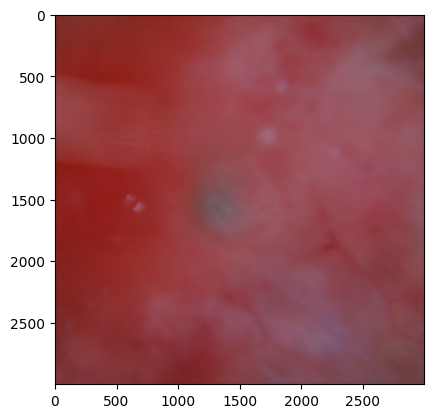

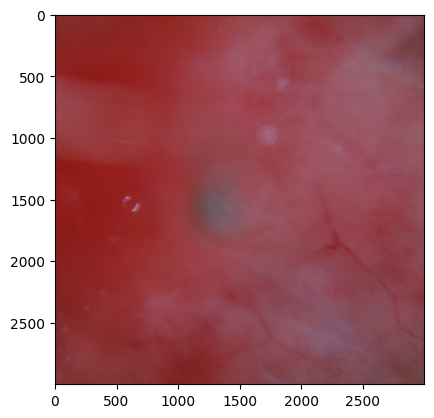

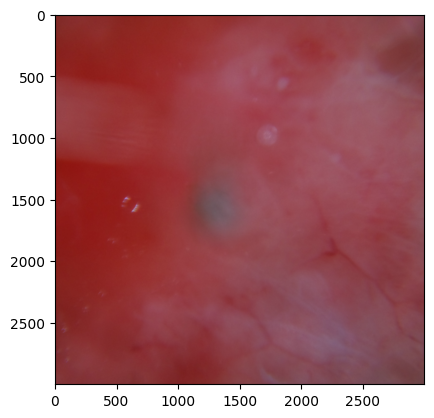

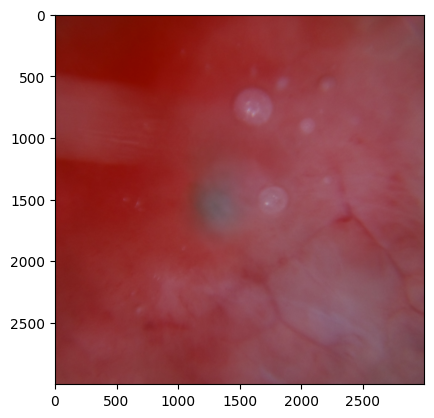

KeyboardInterrupt: ignored

In [ ]:

for img in imgs_good["image"]:
    device_image = img_to_array(Image.open(img))
    # correct
    if color_correct:
        img_avg = device_image.mean(axis=(0,1))
        device_image = np.clip(device_image +
                            np.expand_dims(avg_dv - img_avg, axis=0), 0, 255).astype(int)
    #plt.imshow(device_image)
    #plt.show()
    if center:
        device_image = device_image[1000:4000, 2000:5000]
    plt.imshow(device_image)
    plt.show()


In [ ]:
!ls -at

 HealNet_Pig_Device_Patches.ipynb
'Saved Weights'
 imgs_5.csv
 images_10.csv
 cropped_full_wound.zip
'Copy of HealNet_Pig_Device_Patches.ipynb'
 DenseNet_Classifier_Loss_Patch_Balanced_Corrected.pdf
 DenseNet_Classifier_Acc_Balanced_Corrected.pdf
 model.png
 logs
 TensorBlur
 near
 Pig_Labels_Cleaned_Jul10.csv
 data
 train_ctl.zip
 test_13.zip
 test_exp13_all_labels.csv
 training_control_labels.csv


In [ ]:
goods_df = pd.read_csv("good_images_less05.csv")

FileNotFoundError: ignored

In [ ]:
# get patch dict
#patches = glob.glob("/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_patch/train_ctl_patch/*.jpg")
patches = imgs_quad
count = []
pacount = {}
for patch in patches:
    p = patch.split("/")[-1]
    p = p.split("_")[:-2]
    p = "_".join(p)
    if p not in count:
        count.append(p)
    if p not in pacount:
        pacount[p] = [patch]
    else:
        pacount[p].append(patch)
print(len(count))
#1663 train

1707


In [ ]:
del imgs_10

In [ ]:
imgs_5 = []
for img in pacount:
    if len(pacount[img]) > 5:
        imgs_5.extend(list(np.random.choice(pacount[img], size=5, replace=False)))
    else:
        imgs_5.extend(pacount[img])

In [ ]:
for img in imgs_10:
    print(img)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_patch/train_ctl_patch/exp_11_Day_3_2023-04-07-07-15-01_0.jpg
/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_patch/train_ctl_patch/exp_11_Day_3_2023-04-07-07-15-01_11.jpg
/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_patch/train_ctl_patch/exp_11_Day_1_2023-04-05-02-27-50_18.jpg
/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_patch/train_ctl_patch/exp_11_Day_1_2023-04-05-02-27-50_20.jpg
/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_patch/train_ctl_patch/exp_11_Day_1_2023-04-05-02-27-50_8.jpg
/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_patch/train_ctl_patch/exp_11_Day_1_2023-04-05-02-27-50_19.jpg
/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_patch/train_ctl_patch/exp_11_Day_1_2023-04-05-02-27-50_17.jpg
/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_patch/train_ctl_patch/exp_11_Day_1_2023-04-05-02-27-50_16.jpg
/content/drive/MyDrive/BETR_Summer23/data/exp_c

In [ ]:
!ls data/exp_ctls_patch/train_ctl_patch_10

In [ ]:
"""
import shutil
base = "data/exp_ctls_patch/train_ctl_patch_10/"
for img in imgs_10:
    f = img.split("/")[-1]
    shutil.copy(img, base+f)
"""

KeyboardInterrupt: ignored

In [ ]:
#mkdir /content/drive/MyDrive/BETR_Summer23/data/patched/train

In [ ]:
!ls /content/drive/MyDrive/BETR_Summer23/data/patched

In [ ]:
!rm -r /content/drive/MyDrive/BETR_Summer23/data/patched/test/*.jpg
#!ls data/patched/train/

In [ ]:
# create patched images; 0=(0,0)=ul, 1=(0,1)=ur, 2=(1,0)=ll, 3=(1,1)=lr
img_height = 1500
img_width = 2000
save_dir = "/content/drive/MyDrive/BETR_Summer23/data/patched/test/"
for img_name in tqdm(pacount):
    dst = Image.new('RGB', (2*img_width, 2*img_height), (127, 127, 127))
    for patch in pacount[img_name]:
        img = Image.open(patch)
        location = patch.split("_")[-1].split(".")[0]
        #print(patch, Image.open(patch).height,Image.open(patch).width)
        if location == "0":
            dst.paste(img, (0, 0))
        elif location == "1":
            dst.paste(img, (img_width, 0))
        elif location == "2":
            dst.paste(img, (0, img_height))
        elif location == "3":
            dst.paste(img, (img_width, img_height))
    dst.save(save_dir+f"{img_name}.jpg")

  0%|          | 0/491 [00:00<?, ?it/s]

In [ ]:
!pwd

/content/drive/MyDrive/BETR_Summer23


In [ ]:
len(set(list(pacount.keys())))

747

In [ ]:
len(list(pacount.keys()))

747

In [ ]:
for p in pacount.keys():
    if pacount[p] > 4:
        print(p,":", pacount[p])

In [ ]:
import csv
#my_dict = {'1': 'aaa', '2': 'bbb', '3': 'ccc'}
with open('/content/drive/MyDrive/BETR_Summer23/data/4patch.csv', 'w') as f:
    for key in num_patches.keys():
        f.write("%s,%s\n"%(key,num_patches[key]))

In [ ]:
densenet_cluster_stage

In [ ]:
preds = {"Image":[], "Hemostasis":[], "Inflammation":[], "Proliferation":[],
         "Maturation":[]}

for image_fn in os.listdir(base):
    im = Image.open(base + image_fn).resize((128,128))
    image_data = img_to_array(im)
    image_data = np.expand_dims(image_data, axis=0) # adds batch dim
    pred = dense_cls.predict(image_data, verbose=0)
    pred = pred.flatten()

    preds["Image"].append(image_fn)
    preds["Hemostasis"].append(pred[1])
    preds["Inflammation"].append(pred[2])
    preds["Proliferation"].append(pred[3])
    preds["Maturation"].append(pred[0])

In [ ]:
base

In [ ]:
cols = {"image":[], "expected":[]}

for crop_fn in os.listdir(base):
    day, hour, min = crop_fn[8:16].split("-")
    day = int(day)
    hour = int(hour)
    min = int(min)

    code = crop_fn[8:16]

    # wound 1
    if day == 11:
        # Day 0
        if code <= '11-14-08':
            cols['image'].append(crop_fn)
            cols['expected'].append("Hemo")
        # Day 1 or 2
        else:
            cols['image'].append(crop_fn)
            cols['expected'].append("Infl")

        # # day 0
        # if hour <= 14:
        #     if min >= 20:
        #     device_df['image'].append(crop_fn)
        #     device_df['cluster'].append(1)

    # wound 5
    elif day == 6:
        # Day 0
        if code <= '06-20-52':
            cols['image'].append(crop_fn)
            cols['expected'].append("Hemo")
        else:
            cols['image'].append(crop_fn)
            cols['expected'].append("Infl")
    else:
        print(f"weird {crop_fn}")

In [ ]:
cols_pd = pd.DataFrame.from_dict(cols)

In [ ]:
preds_pd = pd.DataFrame.from_dict(preds)

In [ ]:
cols_pd['expected']

In [ ]:
preds_pd['Expected'] = cols_pd['expected']

In [ ]:
base[:-9]

In [ ]:
preds_pd.to_csv(base[:-9] + 'actuated_preds.csv', index=False)

Todo: Ship the weights, implement smart cropping, blur and aggregation client side

Plot some results

Do we need more control data? yes - those covering proliferation and maturation.

In [ ]:
!date "+%T"

07:34:27


In [ ]:
!ls -alt "/content/drive/MyDrive/BETR_Summer23/data/patched/test/"

total 764
-rw------- 1 root root 1203 Aug 15 07:32 exp_13_Day_0_2023-06-10-04-35-34.jpg
-rw------- 1 root root 1210 Aug 15 07:32 exp_13_Day_0_2023-06-10-04-34-47.jpg
-rw------- 1 root root 1206 Aug 15 07:32 exp_13_Day_0_2023-06-10-04-34-59.jpg
-rw------- 1 root root 1201 Aug 15 07:32 exp_13_Day_0_2023-06-10-04-35-22.jpg
-rw------- 1 root root 1380 Aug 15 07:32 exp_13_Day_0_2023-06-09-21-16-43.jpg
-rw------- 1 root root 1380 Aug 15 07:32 exp_13_Day_0_2023-06-09-21-16-55.jpg
-rw------- 1 root root 1371 Aug 15 07:32 exp_13_Day_0_2023-06-09-21-17-07.jpg
-rw------- 1 root root 1380 Aug 15 07:32 exp_13_Day_0_2023-06-09-21-17-31.jpg
-rw------- 1 root root 1207 Aug 15 07:32 exp_13_Day_0_2023-06-10-04-35-11.jpg
-rw------- 1 root root 1377 Aug 15 07:32 exp_13_Day_0_2023-06-09-21-17-19.jpg
-rw------- 1 root root 1432 Aug 15 07:32 exp_13_Day_0_2023-06-10-02-08-59.jpg
-rw------- 1 root root 1454 Aug 15 07:32 exp_13_Day_0_2023-06-10-02-09-23.jpg
-rw------- 1 root root 1213 Aug 15 07:32 exp_13_Day_0_

In [ ]:
 imgs_train = glob.glob("/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_4patch/*.jpg")
 imgs_val = glob.glob("/content/drive/MyDrive/BETR_Summer23/data/exp_test_4patch/*.jpg")

In [ ]:
from PIL import Image

In [ ]:
!ls data

 clean_full_img   'exp_test_4patch_thr=0.45'
 exp_ctls	   patched
 exp_ctls_4patch   Patches_Balanced
 exp_ctls_patch    Patches_Balanced-20230710T124252Z-001.zip
 exp_test_4patch   test_13


In [ ]:
imgs

['/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_4patch/exp_11_Day_3_2023-04-07-04-11-04_0.jpg',
 '/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_4patch/exp_11_Day_3_2023-04-07-04-11-04_1.jpg',
 '/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_4patch/exp_11_Day_3_2023-04-07-06-16-17_2.jpg',
 '/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_4patch/exp_11_Day_4_2023-04-08-08-10-46_1.jpg',
 '/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_4patch/exp_11_Day_3_2023-04-07-04-11-04_3.jpg',
 '/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_4patch/exp_11_Day_3_2023-04-07-02-51-28_0.jpg',
 '/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_4patch/exp_11_Day_3_2023-04-07-02-51-28_1.jpg',
 '/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_4patch/exp_11_Day_3_2023-04-07-08-21-30_2.jpg',
 '/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_4patch/exp_11_Day_4_2023-04-08-01-36-46_0.jpg',
 '/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_4patch/exp_11_Day_4_2023-04-08-01-36-4

In [ ]:
#imgs = glob.glob("/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_patch/train_ctl_patch/*.jpg")
imgs = patches
for img_name in tqdm(imgs):
    img = Image.open(img_name).resize((128,128)).save(img_name)

    #print(img_name)

  0%|          | 0/38190 [00:00<?, ?it/s]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-c321cd4beb08>", line 4, in <cell line: 3>
    img = Image.open(img_name).resize((128,128)).save(img_name)
  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 3236, in open
    prefix = fp.read(16)
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1

In [ ]:
#!rm '/content/drive/MyDrive/BETR_Summer23/data/exp_ctls_4patch/exp_12_Day_3_2023-05-19-16-00-48_0.jpg'

In [ ]:
import pickle
#loading original images days
with open('data/imgs_by_day.pkl', 'rb') as f:
    imgs_by_day = pickle.load(f)

In [ ]:
imgs_quad = glob.glob('/content/drive/MyDrive/BETR_Summer23/data/exp_patch_quadrant/train_quad_tr=0.5/*.jpg')

In [ ]:
count = 0
base_imgs_train = {}

print("mapping images to wound, day, and quadrant...")
for fn in imgs_quad:
    tmp = fn.split("/")[-1].split("_")
    img = "_".join(tmp[4:-2])+".jpg"
    if img not in base_imgs_train.keys():
        base_imgs_train[img] = [fn.split("/")[-1]]
    else:
        base_imgs_train[img].append(fn.split("/")[-1])
    #if img in imgs_by_day.keys():
    #    count += 1

exp_day = {}

for x in base_imgs_train.keys():
    #print(base_imgs_train[x])
    day_wound = deepcopy(imgs_by_day[x])
    #print(day_wound)
    count = 0
    for im in base_imgs_train[x]:
        tmp = im.split("_")
        if tmp[1] not in exp_day.keys():
            exp_day[tmp[1]] = {}
        if tmp[3] not in exp_day[tmp[1]].keys():
            exp_day[tmp[1]][tmp[3]] = {}#[im]
        if day_wound[1] not in exp_day[tmp[1]][tmp[3]].keys():
            exp_day[tmp[1]][tmp[3]][day_wound[1]] = {}
        #print(exp_day[ tmp[1] ][ tmp[3] ][ day_wound[1] ])
        #print(tmp[-2] )
        if tmp[-2] not in exp_day[ tmp[1] ][ tmp[3] ][ day_wound[1] ].keys():
            exp_day[ tmp[1] ][ tmp[3] ][ day_wound[1] ][ tmp[-2] ] = [im]
        else:
            exp_day[tmp[1]][tmp[3]][day_wound[1]][ tmp[-2] ].append(im)

count = 0
wound_exp_combined = {}
data =  pd.DataFrame(columns=["image","wound","day","quadrant"])
for i in exp_day.keys():
    #print(f"{i}:")
    for day in exp_day[i].keys():
        #print(f"  {day}:")
        #print(exp_day[i][j])
        for k in exp_day[i][day].keys():
            #print(f"    {k}:")
            #if i+k.split("_")[1] not in wound_exp_combined.keys():
            #    wound_exp_combined[i+k.split("_")[1]] = {}
            #print(i+k.split("_")[1], j)
            #wound_exp_combined[i+k.split("_")[1]][day] = {}
            #print(wound_exp_combined)

            for quad in exp_day[i][day][k].keys():
                #print(f"     {quad}")
                #wound_exp_combined[i+k.split("_")[1]][day][quad] = exp_day[i][day][k][quad]
                q = int( i+k.split("_")[1] )
                for x_img in exp_day[i][day][k][quad]:
                    data.loc[len(data.index)] = [x_img, i+k.split("_")[1], day, quad]
                #print(f"{day} { q } {quad}: {len(exp_day[i][day][k][quad])}")
                #wound_exp_combined[i+k][l] =
                count += 1
                #print(f"       {len(exp_day[i][j][k][l])}")
print(f"created dataframe of size {data.shape}...")

In [ ]:
print("creating training samples...")
x = [0,1,2,3,4,5,6]
y = [0,1,2,3,4,5,6]
combo = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
drops = []
for i in range(len(combo)):
    if combo[i][0] == combo[i][1]:
       drops.append(i)

nump_sample = 10
samples = []
label = []
count = 0
for quadrant in ["00", "01","10","11"]:
    for wound in ['123', '127', '117', '113']:
        img_sample_df = data[ (data["quadrant"]==quadrant) & (data["wound"]==wound) ].groupby('day').apply(lambda x:  x.sample(nump_sample,replace=False) if len(x) > nump_sample else x.sample(nump_sample,replace=True)).reset_index(drop=True)
        #print(img_sample_df.shape)
        img_arr = np.array(img_sample_df["image"])
        img_arr = img_arr.reshape(7,nump_sample)
        for i in range(nump_sample):
            for j in range(i+1, nump_sample):
                count1 += 1
                for combo in combos:
                    img_1 = (img_arr[combo[0], i])
                    img_2 = (img_arr[combo[1], j])
                    samples.append((img_1,img_2))
                    label.append(1 if combo[0] > combo[1] else 0)
                    #print(img_1)
                    #print(img_2)
                    #print(label)
                    #print("")
                    count += 1
print(f" {count} samples created.")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



creating training samples...
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-177-7ac4372c2cc7>", line 23, in <cell line: 14>
    for combo in combos:
NameError: name 'combos' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.1

In [ ]:
del combos


In [ ]:
count = 0
for x in exp_day:
    for y in exp_day[x]:
        for z in exp_day[x][y]:
            for i in exp_day[x][y][z]:
                count += 1
print(count)

112


In [ ]:
# patches intermixed acrossed patches
from copy import deepcopy
patches_={}
for img in base_imgs_train.keys():
    #print(img)
    #print(base_imgs_train[img])
    #print( base_imgs_train[img] )
    #print(wd_)
    tmp = deepcopy(imgs_by_day[img])

    if int(tmp[0].split(" ")[1]) not in patches_.keys():
        patches_[ tmp[0] ] = {}
    #patches_[ tmp[0] ][ tmp[1] ] = {}
    """
    for patch in base_imgs_train[img]:
        p_split = patch.split("_")
        print(p_split)
        p_loc = int(p_split[-2])
        #print(p_loc)
        if int(p_split[1]) not in patches_[ tmp[0] ].keys():
            patches_[ tmp[0] ][int(p_split[1])] = {}

        if p_loc not in patches_[ tmp[0] ].keys():
            patches_[ tmp[0] ][p_loc] = [patch]
        else:
            patches_[ tmp[0] ][p_loc].append(patch)

        #print(patch)

        #print(tmp)

        #print(tmp[-2])
        #wd_.append( int( tmp[-1].split(".")[0]) )
        #print(tmp[-1].split(".")[0])
        #patches_[patch] = wd_
        #wd_ = []
    """

In [ ]:

combos = np.delete(combo,drops,axis=0)

In [ ]:
len(combos)*4*60

10080

In [ ]:
combos

array([[0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [0, 5],
       [0, 6],
       [1, 0],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 5],
       [1, 6],
       [2, 0],
       [2, 1],
       [2, 3],
       [2, 4],
       [2, 5],
       [2, 6],
       [3, 0],
       [3, 1],
       [3, 2],
       [3, 4],
       [3, 5],
       [3, 6],
       [4, 0],
       [4, 1],
       [4, 2],
       [4, 3],
       [4, 5],
       [4, 6],
       [5, 0],
       [5, 1],
       [5, 2],
       [5, 3],
       [5, 4],
       [5, 6],
       [6, 0],
       [6, 1],
       [6, 2],
       [6, 3],
       [6, 4],
       [6, 5]])

In [ ]:
len(combos)

42

In [ ]:
x = [0,1,2]
y = [0,1,2]
combo = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
drops = []
for i in range(len(combo)):
    if combo[i][0] == combo[i][1]:
       drops.append(i)
combos = np.delete(combo,drops,axis=0)

In [ ]:
n=9
count = 0
for i in range(0,n):
    for j in range(i+1,n):
        print(i,j)
        count += 1
print(count)
print(n*(n-1)/2)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
1 2
1 3
1 4
1 5
1 6
1 7
1 8
2 3
2 4
2 5
2 6
2 7
2 8
3 4
3 5
3 6
3 7
3 8
4 5
4 6
4 7
4 8
5 6
5 7
5 8
6 7
6 8
7 8
36
36.0
